# Online Fraud Payment transactions detection model

# Objective: Develop a machine-learning model that will efficiently detect and flag financial fraud transactions. 

## Data used: [link](https://www.kaggle.com/datasets/bannourchaker/frauddetection/data)
**Source: Kaggle**

Synthetic dataset with financial transactions of mobile payments application. 


| Column         | Description                                                          |
|----------------|----------------------------------------------------------------------|
| step           | Represents a unit of time where 1 step equals 1 hour.                |
| type           | The type of online transaction.                                      |
| amount         | The amount of the transaction.                                       |
| nameOrig       | The customer initiating the transaction.                             |
| oldBalanceOrg  | The balance before the transaction of the initiator.                 |
| newBalanceOrig | The balance after the transaction of the initiator.                  |
| nameDest       | The recipient of the transaction.                                    |
| oldBalanceDest | The initial balance of the recipient before the transaction.         |
| newBalanceDest | The new balance of the recipient after the transaction.              |
| isFraud        | Indicates whether the transaction is fraudulent (`Yes` or `No`).     |
| isFlaggedFraud | Column that represent whether Fraud transaction was flagged and stopped correctly by existing measures. |

# Libraries 


In [2]:
# all useful libraries for data analysis

# library that allows importing data from internet sources 
from pathlib import Path

# library that is used for mathematical computations
import numpy as np
from numpy import where 

# library that is used for data management (creating dataframes, aggregating data, cleaning data)
import pandas as pd

# libraries for static data visualizations (Exploratory Data Analysis, Machine Learning (ML) Model evaluation)
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pylab as plt

# logistic regression model from sklearn sklearn library
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Decision Tree model from sklearn Library
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

# Decision Tree ensemble models from sklearn library for a higher accuracy and performance
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier

# Useful model selection packages from sklearn to optimized model training
## train_test_split - split the data into training and validation (test) samples
## cross_val_score/stratifiedKFold- a quality and reliable way of assessing model performance
## GridSearchCV, RandomizedSearchCV - useful packages that help in search of significant variables for classification
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, StratifiedKFold, GridSearchCV,RandomizedSearchCV


## StandardScaler - useful tool that is used to standardize the data 
## FunctionTransformer - function that allows application of several transformation on the data. 
### For example: log transofrmation
## ColumnTransformer - function that allow additional transformation of columns in the dataset if needed. 
## Make Pipeline - function that allows combining several functions into one object to imrove efficiency of coding.
## sklearn.metrics, scipy.stats, 
### and statsmodels.stats.outliers_influence - useful packages for assessment of data and ML model.
from sklearn.preprocessing import StandardScaler, FunctionTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve, PrecisionRecallDisplay, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from scipy.stats import randint
from sklearn.utils import shuffle


## dmba - data mining for Business Analytics package 
import dmba
## dmba packages provides additional methods of assessing ML model and its predictive/classification power. 
from dmba import plotDecisionTree, classificationSummary, gainsChart, liftChart
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba.metric import AIC_score


%matplotlib inline

Necessary libraries are imported now. Data should be explored and cleaned if necessary to prepare it for models training. 

# Exploratory Data Analysis (EDA)

In [3]:
# import the data 
## csv from the Kaggle 
df = pd.read_csv('onlinefraud.csv')



In [4]:
# read first five rows 
print('First five rows of the data:')
df.head(5)


First five rows of the data:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
# read last five rows 
print('Last five rows of the data:')
df.tail(5)

Last five rows of the data:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


| Column         | Description                                                          |
|----------------|----------------------------------------------------------------------|
| step           | Represents a unit of time where 1 step equals 1 hour.                |
| type           | The type of online transaction.                                      |
| amount         | The amount of the transaction.                                       |
| nameOrig       | The customer initiating the transaction.                             |
| oldBalanceOrg  | The balance before the transaction of the initiator.                 |
| newBalanceOrig | The balance after the transaction of the initiator.                  |
| nameDest       | The recipient of the transaction.                                    |
| oldBalanceDest | The initial balance of the recipient before the transaction.         |
| newBalanceDest | The new balance of the recipient after the transaction.              |
| isFraud        | Indicates whether the transaction is fraudulent (`Yes` or `No`).     |
| isFlaggedFraud | Column that represent whether Fraud transaction was flagged and stopped correctly by existing measures. |

In [6]:
# information about dataset 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
# Check if data contains any null values 
# dataframe format 
missing_data_df = pd.DataFrame(df.isnull().sum()).reset_index()

# rename columns for clear understanding
missing_data_df.columns = ['column', 'number of rows with missing data']

# check
missing_data_df

,column,number of rows with missing data
0,step,0
1,type,0
2,amount,0
3,nameOrig,0
4,oldbalanceOrg,0
5,newbalanceOrig,0
6,nameDest,0
7,oldbalanceDest,0
8,newbalanceDest,0
9,isFraud,0


There are no missing rows in the data, I can proceed with EDA. 

## Effectiveness of existing Anti-Fraud measures 


There is a `isFlaggedFraud` variable, which could be interpreted as if there already is some kind of algoritm that detects fraud transactions. It would be wise to validate the accuracy of this "algorithm".

In [8]:
# data to show how many fraud transactions were flagged correctly 

# all fraud transactions 
all_fraud = df[df['isFraud'] == 1].shape[0]

# not flagged but fraud
not_flagged_fraud = df[(df['isFraud'] == 1) & (df['isFlaggedFraud'] == 0)].shape[0]

# flagged and fraud
flagged_fraud = df[(df['isFraud'] == 1) & (df['isFlaggedFraud'] == 1)].shape[0]

# fraud 
fraud = [not_flagged_fraud, flagged_fraud]

# percentage not flagged but fraud 
not_flagged_fraud_pct = (not_flagged_fraud / all_fraud) * 100

# percentage flagged and fraud 
flagged_fraud_pct = (flagged_fraud / all_fraud) * 100

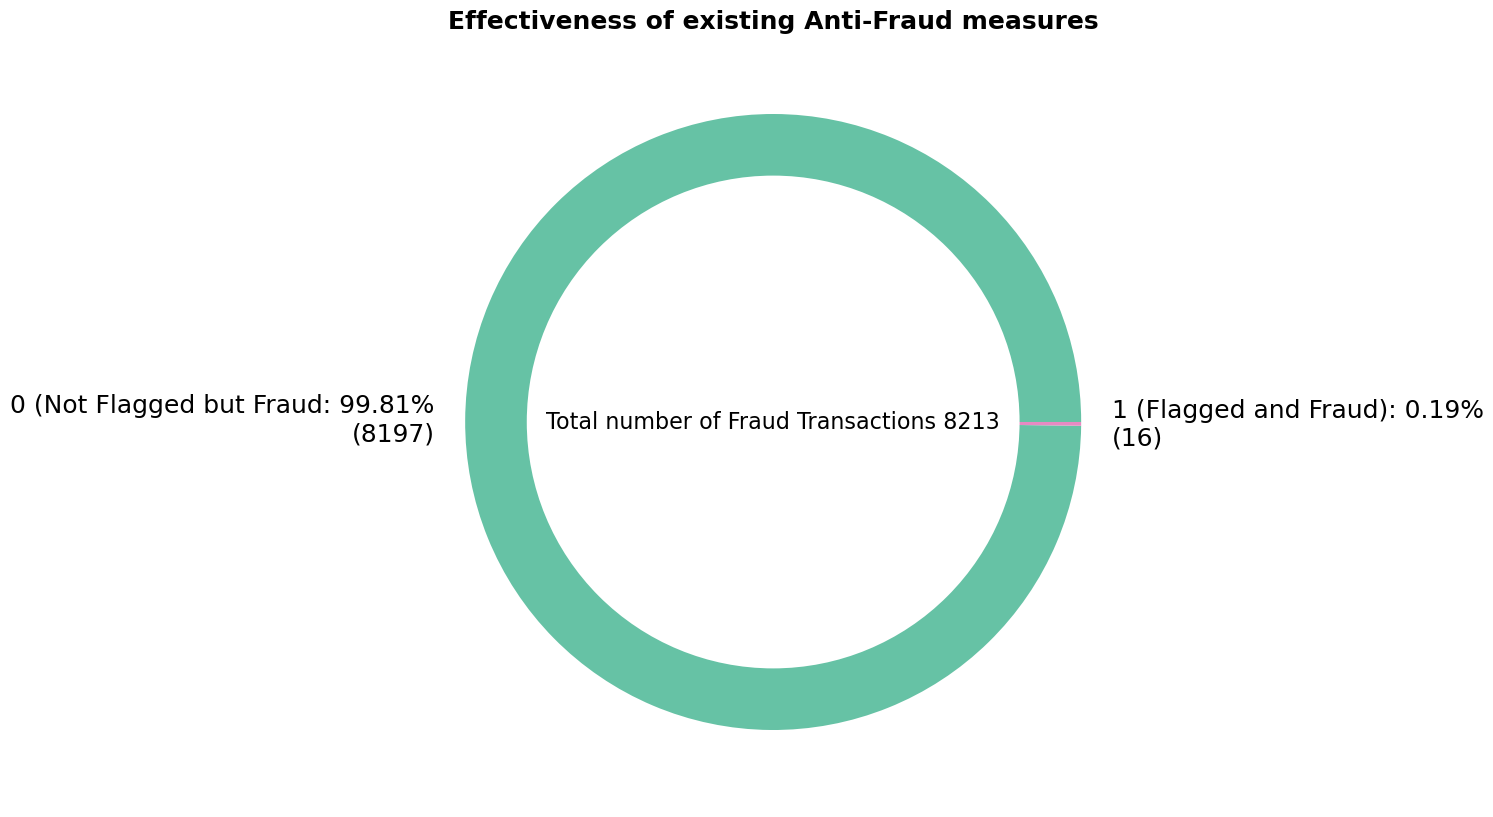

In [9]:
# pie-chart plot 
# plot size 
# 16 - length 
# 10 - height 
plt.figure(figsize = (16, 10))

# function to show labels and percentages of fraud transactions for each type 
labels_with_info = ['{}: {:.2f}%\n({})'.format(types, percentage, counts) for types, percentage, counts in 
                    zip(['0 (Not Flagged but Fraud', '1 (Flagged and Fraud)'], 
                        [not_flagged_fraud_pct, flagged_fraud_pct], 
                        fraud
)]
 
# pie-chart plot 
plt.pie( 
    # values
    fraud,
    # labels
    labels = labels_with_info,
    # text size 
    textprops = {'fontsize': 18}, 
    # color palette
    colors = ['#66c2a5', '#e78ac3'])

# circle at the center of pie to make it a donut 
circle = plt.Circle((0, 0), 0.80, fc = 'white')
plt.gcf().gca().add_artist(circle)

# add total in the center 
total = (not_flagged_fraud + flagged_fraud)

# apply total number on pie chart 
plt.text(0, 0, f"Total number of Fraud Transactions {total}", 
               ha='center', 
               va='center', fontsize=16)

# parameters
## title 
plt.title('Effectiveness of existing Anti-Fraud measures', fontweight = 'bold', fontsize = 18)

plt.show()



Among 8213 transactions, only 16 fraud transactions were effectively flagged, which indicates that there is a need of a new algorithm that will effectively recognize fraud transactions. 

## Transaction types 


In [10]:
# check types of the transactions and count values of transactions
# dataframe format
transaction_types_df = pd.DataFrame(df.type.value_counts()).reset_index()

# rename columns for clear understanding
transaction_types_df.columns = ['transaction_type', 'transactions_number']

# total number of transactions
total_number = transaction_types_df['transactions_number'].sum()

# percentage of each transaction
transaction_types_df['percentage'] = (transaction_types_df['transactions_number'] / total_number) * 100

# check 
transaction_types_df

,transaction_type,transactions_number,percentage
0,CASH_OUT,2237500,35.166331
1,PAYMENT,2151495,33.814608
2,CASH_IN,1399284,21.992261
3,TRANSFER,532909,8.375622
4,DEBIT,41432,0.651178


In [11]:
# check number of fraud transactions by each type of transaction
# fraud transaction = 1
fraud_transactions = df.groupby('type')['isFraud'].sum().reset_index()
    
# rename columns 
fraud_transactions.columns = ['transaction_type', 'fraud_transactions_number']

# sort from biggest number to the least 
fraud_transactions = fraud_transactions.sort_values('fraud_transactions_number', ascending = False)

# show overall graph 
# check 
fraud_transactions

,transaction_type,fraud_transactions_number
1,CASH_OUT,4116
4,TRANSFER,4097
0,CASH_IN,0
2,DEBIT,0
3,PAYMENT,0


In [12]:
# merge two dataframes 
transaction_types =  pd.merge(transaction_types_df, 
                             fraud_transactions, 
                             on = 'transaction_type', 
                             how = 'left')

# create a variable that represents percentage of fraud transaction among all transactions 
computation = (transaction_types['fraud_transactions_number'] / transaction_types['transactions_number']) * 100
transaction_types['fraud_percentage'] = computation

# sort 
# sort from biggest number to the least 
transaction_types = transaction_types.sort_values('fraud_transactions_number', ascending = False)

# create a dataframe for plot 
## filter 
filter_row = transaction_types['fraud_transactions_number'] != 0
## apply filter 
transaction_types_plot = transaction_types.loc[filter_row, :]

# check 
transaction_types





,transaction_type,transactions_number,percentage,fraud_transactions_number,fraud_percentage
0,CASH_OUT,2237500,35.166331,4116,0.183955
3,TRANSFER,532909,8.375622,4097,0.768799
1,PAYMENT,2151495,33.814608,0,0.000000
2,CASH_IN,1399284,21.992261,0,0.000000
4,DEBIT,41432,0.651178,0,0.000000


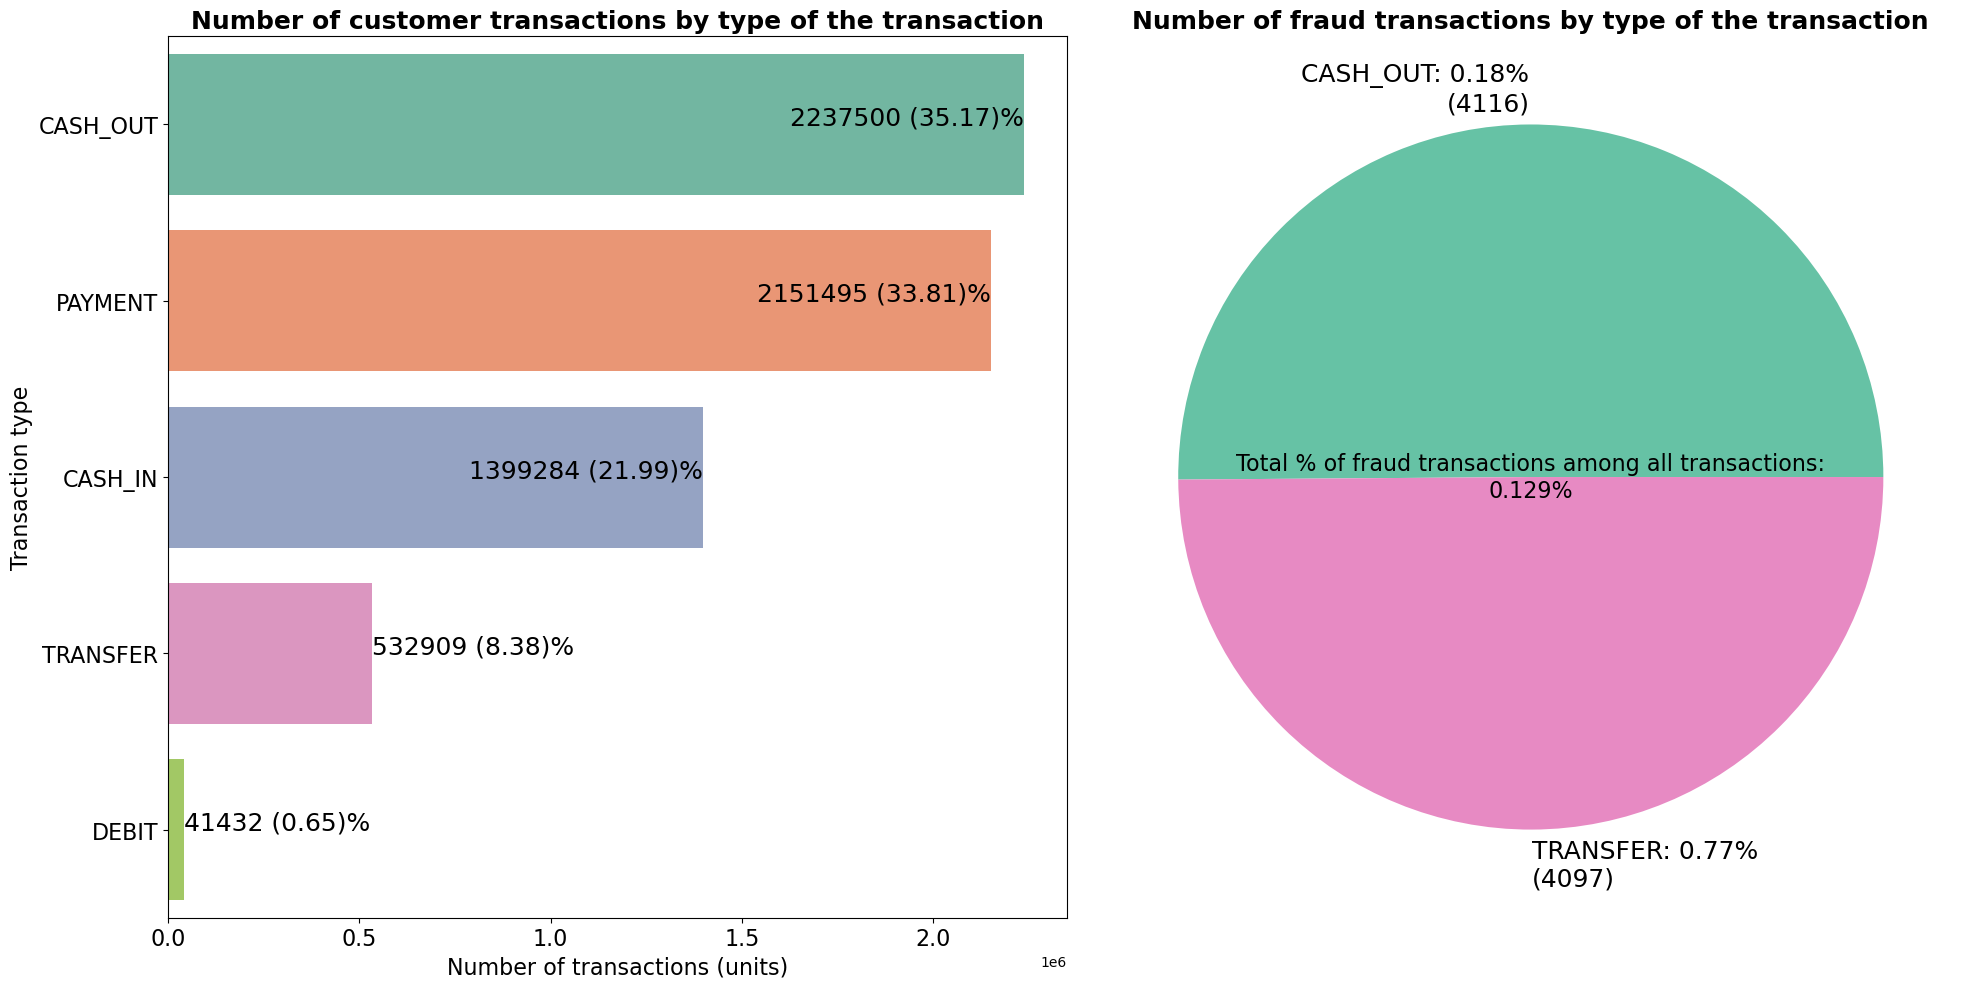

In [13]:
# function to show labels and percentages of fraud transactions for each type 
labels_with_info = ['{}: {:.2f}%\n({})'.format(types, percentage, counts) for types, percentage, counts in 
                    zip(transaction_types_plot['transaction_type'], transaction_types_plot['fraud_percentage'], 
                        transaction_types_plot['fraud_transactions_number']
)]


# subplot 1 row, 2 columns, 1st figure 
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1) 
# bar-chart code 
barplot = sns.barplot(# data
            data = transaction_types_df,
            # x
            x = 'transactions_number', 
            # y
            y = 'transaction_type', 
            # color palette
            palette = sns.color_palette('Set2'))


# parameters 
# x-label 
plt.xlabel('Number of transactions (units)', fontsize = 16)
plt.xticks(fontsize = 16)
# y-label 
plt.ylabel('Transaction type', fontsize = 16)
plt.yticks(fontsize = 16)
# title 
plt.title('Number of customer transactions by type of the transaction', fontweight = 'bold', fontsize = 18)

# add annotations
for index, row in transaction_types_df.iterrows():
    # horizontal alignment 
    if index in transaction_types_df.index[-2:]:
        ha_alignment = 'left'
    
    else:
        ha_alignment = 'right'
    
    # apply text on barplot
    barplot.text(row['transactions_number'],index, f"{row['transactions_number']} ({row['percentage']:.2f})%", 
            color = 'black', ha = ha_alignment, fontsize = 18)




# suplot 1 row, 2 columns, 2nd figure 
plt.subplot(1, 2, 2)

# pie-chart plot 
plt.pie(
    # values
    transaction_types_plot['fraud_transactions_number'],
    # labels
    labels = labels_with_info,
    # text size 
    textprops = {'fontsize': 18}, 
    # color palette
    colors = ['#66c2a5', '#e78ac3'])

# add total in the center 
total = (np.sum(transaction_types['fraud_transactions_number']) / np.sum(transaction_types['transactions_number'])) * 100

# apply total number on pie chart 
plt.text(0, 0, f"Total % of fraud transactions among all transactions:\n{round(total, 3)}%", 
               ha='center', 
               va='center', fontsize=16)

# title 
plt.title('Number of fraud transactions by type of the transaction', fontweight = 'bold', fontsize = 18)

# show plot
plt.tight_layout()
plt.show()


`Cashout` and `Payment` transactions are the most common and popular transactions among customers. However, data also suggests that fraud cases are only present in `Cashout` and less popular `Transfer` transactions. 

## Financial values of each transaction type and potential financial costs (fraud transactions)


In [14]:
# dataframe : median customer transaction amount for each transaction type 
transaction_amount = df[df['isFraud'] != 1].groupby('type')['amount'].median().reset_index()

# rename columns 
transaction_amount.columns = ['transaction_type', 'median_amount_usd']

# sort values 
transaction_amount = transaction_amount.sort_values('median_amount_usd', ascending = False)

# check 
transaction_amount

,transaction_type,median_amount_usd
4,TRANSFER,486521.91
1,CASH_OUT,146946.56
0,CASH_IN,143427.71
3,PAYMENT,9482.19
2,DEBIT,3048.99


In [15]:
# dataframe: median fraud transaction amount for each transaction type 
fraud_amount = df[df['isFraud'] == 1].groupby('type')['amount'].median().reset_index()

# rename columns 
fraud_amount.columns = ['transaction_type', 'median_fraud_amount_usd']

# check 
fraud_amount

,transaction_type,median_fraud_amount_usd
0,CASH_OUT,435516.905
1,TRANSFER,445705.760


In [16]:
# merge dataframes 
transaction_amount = pd.merge(transaction_amount, 
                             fraud_amount, 
                             on = 'transaction_type', 
                             how = 'left')

# check 
transaction_amount

,transaction_type,median_amount_usd,median_fraud_amount_usd
0,TRANSFER,486521.91,445705.760
1,CASH_OUT,146946.56,435516.905
2,CASH_IN,143427.71,NaN
3,PAYMENT,9482.19,NaN
4,DEBIT,3048.99,NaN


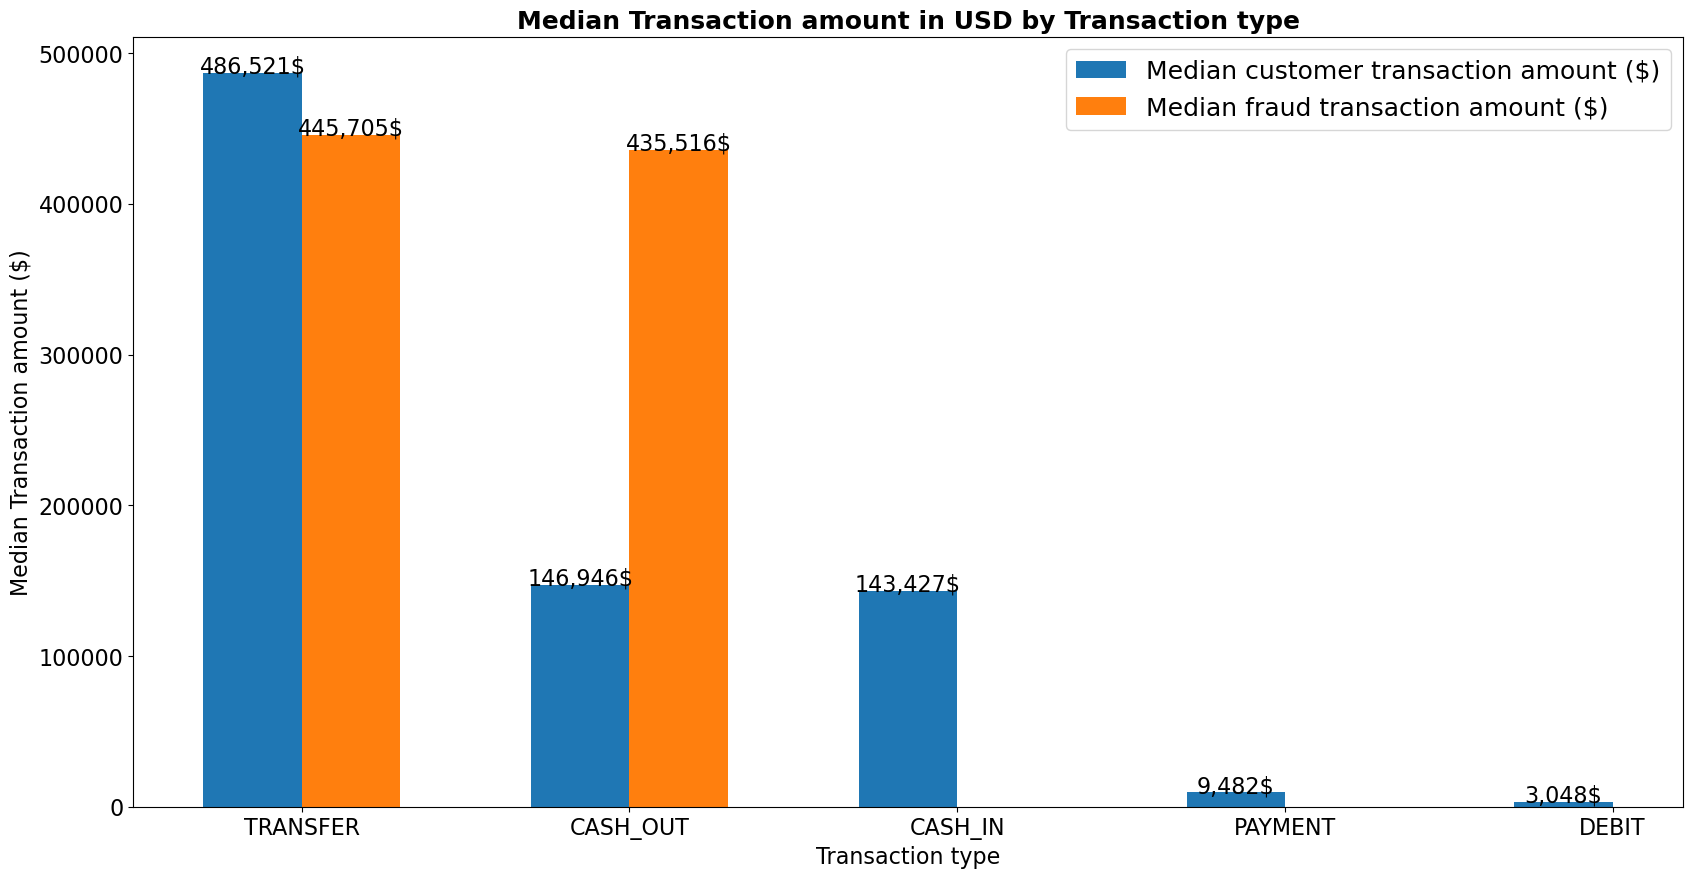

In [17]:
# bar-charts plot 
# plot size 
# 20 - length 
# 10 - height 
plt.figure(figsize = (20, 10))

# bar width 
bar_width = 0.30

# positions for set of bars 
positions = np.arange(len(transaction_amount['transaction_type']))

# median transaction amount bar 
bar1 = plt.bar(
    # x 
    positions, 
    # y
    transaction_amount['median_amount_usd'],
    # bar width 
    width = bar_width, 
    # label
    label  = 'Median customer transaction amount ($)')

# median fraud amount bar 
bar2 = plt.bar(
    # x
    positions + bar_width, 
    # y
    transaction_amount['median_fraud_amount_usd'], 
    # bar width 
    width = bar_width, 
    # label 
    label = 'Median fraud transaction amount ($)')


# add annotations
for index, row in transaction_amount.iterrows():
    # apply text on both barplots
    # customer transactions barplot
    plt.text(index, row['median_amount_usd'] + 5, f"{int(row['median_amount_usd']):,}$", 
             # color of text
             color = 'black', 
             # horizontal alignment 
             ha = 'center', 
             # vertical alignment
             va = 'baseline', 
            # font size 
             fontsize = 16)
    
    # fraud transactions barplot 
    # if fraud value is not missing 
    if not pd.isnull(row['median_fraud_amount_usd']):
        plt.text(index + bar_width, 
             row['median_fraud_amount_usd'] + 5, 
             f"{int(row['median_fraud_amount_usd']):,}$", 
             color='black', 
             ha='center',
             va = 'baseline', 
             fontsize=16)

    


# parameters
## title 
plt.title('Median Transaction amount in USD by Transaction type', fontweight = 'bold', fontsize = 18)

## xlabel
plt.xlabel('Transaction type', fontsize = 16)

## x-axis 
plt.xticks(positions + bar_width / 2, transaction_amount['transaction_type'].to_list(), fontsize = 16)

## ylabel
plt.ylabel('Median Transaction amount ($)', fontsize = 16)

## y-axis 
plt.yticks(fontsize = 16)

# legend
plt.legend(loc = 'upper right', fontsize = 18)


plt.show()



Graph above indicates that fraud transactions have very high financial costs for the firm. Median amount of fraud transactions in TRANSFER transactions is nearlly equal to customer amount and median fraud transaction amoun in CASH_OUT transactions is 4 times higher.

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

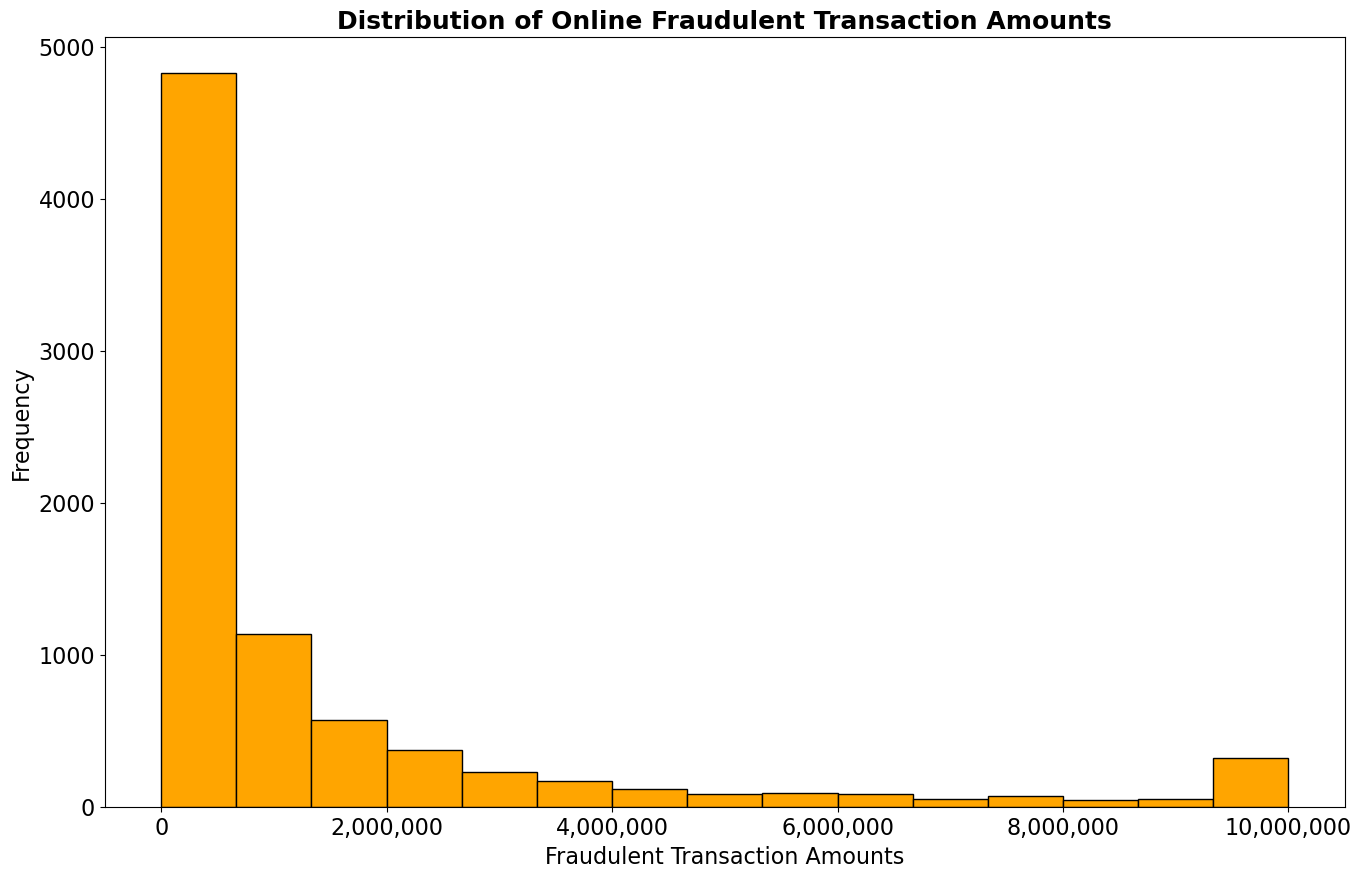

In [20]:
# library that is needed now 
import matplotlib.ticker as ticker

# datafrmame `transactions` to show money distribution of fraud transactions
transactions_fraud = df[df.isFraud == 1]
transactions_fraud = transactions_fraud.sort_values(by = ['amount'], ascending = False)



# 1st plot 
# histogram plot
transactions_fraud.amount.plot(
    # figure type 
    kind = 'hist', 
    # number of bins
    bins = 15,
    # bin color
    facecolor = 'orange',
    # plot size (length, height)
    figsize = (16, 10), 
    # bin edge color
    edgecolor = 'black')

# format of x axist to show full values
plt.ticklabel_format(style='plain', axis='x')  

# show values through coma
formats = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formats)

# parameters 
## title
plt.title('Distribution of Online Fraudulent Transaction Amounts', fontsize = 18, fontweight = 'bold')
## xlabel
plt.xlabel('Fraudulent Transaction Amounts', fontsize = 16)
## xticks 
plt.xticks(fontsize = 16)
## ylabel
plt.ylabel('Frequency', fontsize = 16)
## yticks
plt.yticks(fontsize = 16)





Most of the fraud transactions amounts are up to 4 million dollars, but there are transactions present which reach to 10 millions dollars. This insight again indicates that company is suffering from high financial losses and strong machine-learning algorithm is needed. 

## Customer Transaction Origin account

In [21]:
# new dataframe with only customer cases 
accounts = df[df['isFraud'] == 0]

# how many times similar account was used for fraud
customer = accounts['nameOrig'].value_counts()

# top 10 rows of fraud dataframe 
top10_customer = customer.head(10)

# bottom 10 rows of fraud dataframe
bottom10_customer = customer.tail(10)

# merge 2 subsets 
merged_customer = pd.concat([top10_customer, bottom10_customer])

# convert to dataframe 
merged_customer = pd.DataFrame(merged_customer).reset_index()

# rename columns 
merged_customer.columns = ['original_account_number', 'times_used']

merged_customer

,original_account_number,times_used
0,C1902386530,3
1,C2051359467,3
2,C1677795071,3
3,C400299098,3
4,C363736674,3
5,C1832548028,3
6,C1784010646,3
7,C1530544995,3
8,C2098525306,3
9,C1976208114,3


C:\Users\Beibarys Nyussupov\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'C1902386530'),
  Text(0, 1, 'C2051359467'),
  Text(0, 2, 'C1677795071'),
  Text(0, 3, 'C400299098'),
  Text(0, 4, 'C363736674'),
  Text(0, 5, 'C1832548028'),
  Text(0, 6, 'C1784010646'),
  Text(0, 7, 'C1530544995'),
  Text(0, 8, 'C2098525306'),
  Text(0, 9, 'C1976208114'),
  Text(0, 10, 'C1653939292'),
  Text(0, 11, 'C1944988793'),
  Text(0, 12, 'C486054054'),
  Text(0, 13, 'C949435242'),
  Text(0, 14, 'C1624122524'),
  Text(0, 15, 'C638139918'),
  Text(0, 16, 'C393639841'),
  Text(0, 17, 'C1800825581'),
  Text(0, 18, 'C1040150492'),
  Text(0, 19, 'C49652609')])

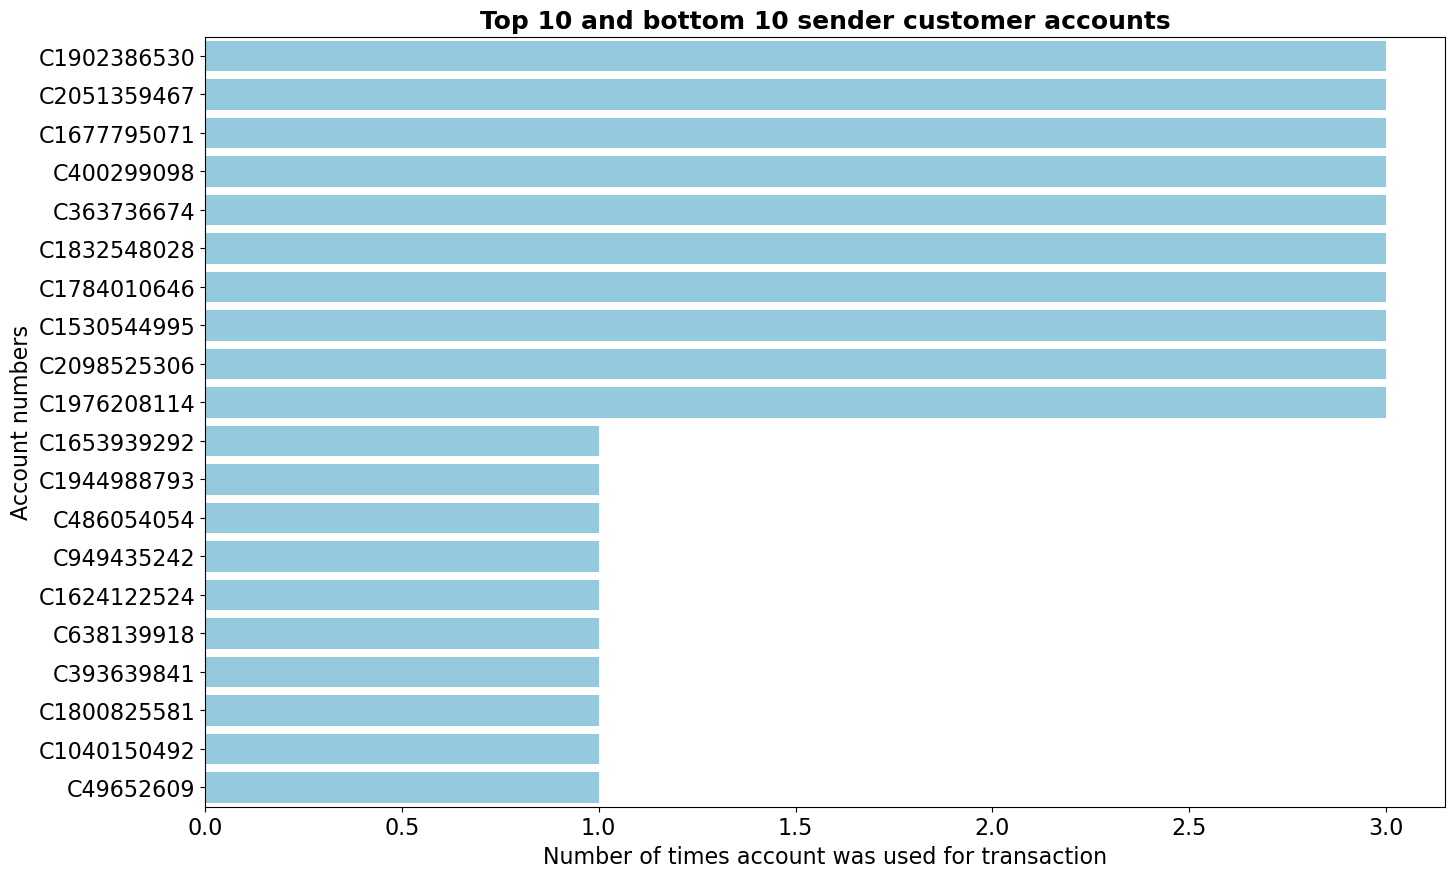

In [22]:
# bar plot showing top 10 and bottom 10 customer accounts
# figure size 
plt.figure(figsize = (16, 10))


# bar plot 
sns.barplot( 
       # x
       merged_customer['times_used'], 
       # y 
       merged_customer['original_account_number'],
    # color 
    color = 'skyblue')


# parameters 
## title 
plt.title('Top 10 and bottom 10 sender customer accounts', fontsize = 18, fontweight = 'bold')

## xlabel 
plt.xlabel('Number of times account was used for transaction', fontsize = 16)
## xaxis 
plt.xticks(fontsize = 16)

## ylabel 
plt.ylabel('Account numbers', fontsize = 16)
## yaxis 
plt.yticks(fontsize = 16)

## Customer and Fraud Transaction Destination Accounts

In [23]:
# new dataframe with only customer recipients (not fraud) 
accounts = df[df['isFraud'] == 0]

# how many times similar account was used for fraud
customer = accounts['nameDest'].value_counts()

# top 10 rows of fraud dataframe 
top10_customer = customer.head(10)

# bottom 10 rows of fraud dataframe
bottom10_customer = customer.tail(10)

# merge 2 subsets 
merged_customer = pd.concat([top10_customer, bottom10_customer])

# convert to dataframe 
merged_customer = pd.DataFrame(merged_customer).reset_index()

# rename columns 
merged_customer.columns = ['destination_account_number', 'times_used']

merged_customer

# C - Customers 
# M - Merchants (Sellers)

,destination_account_number,times_used
0,C1286084959,113
1,C985934102,109
2,C665576141,105
3,C2083562754,102
4,C248609774,101
5,C1590550415,101
6,C451111351,99
7,C1789550256,99
8,C1360767589,98
9,C1023714065,97


In [25]:
# new dataframe with only fraud cases 
accounts = df[df['isFraud'] == 1]

# how many times similar account was used for fraud
fraud = accounts['nameDest'].value_counts()

# top 10 rows of fraud dataframe 
top10_fraud = fraud.head(10)

# bottom 10 rows of fraud dataframe
bottom10_fraud = fraud.tail(10)

# merge 2 subsets 
merged_fraud = pd.concat([top10_fraud, bottom10_fraud])

# convert to dataframe 
merged_fraud = pd.DataFrame(merged_fraud).reset_index()

# rename columns 
merged_fraud.columns = ['destination_account_number', 'times_used']

# check 
merged_fraud

,destination_account_number,times_used
0,C1193568854,2
1,C104038589,2
2,C200064275,2
3,C1497532505,2
4,C1601170327,2
5,C1655359478,2
6,C2020337583,2
7,C1653587362,2
8,C1013511446,2
9,C2129197098,2


C:\Users\Beibarys Nyussupov\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Beibarys Nyussupov\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


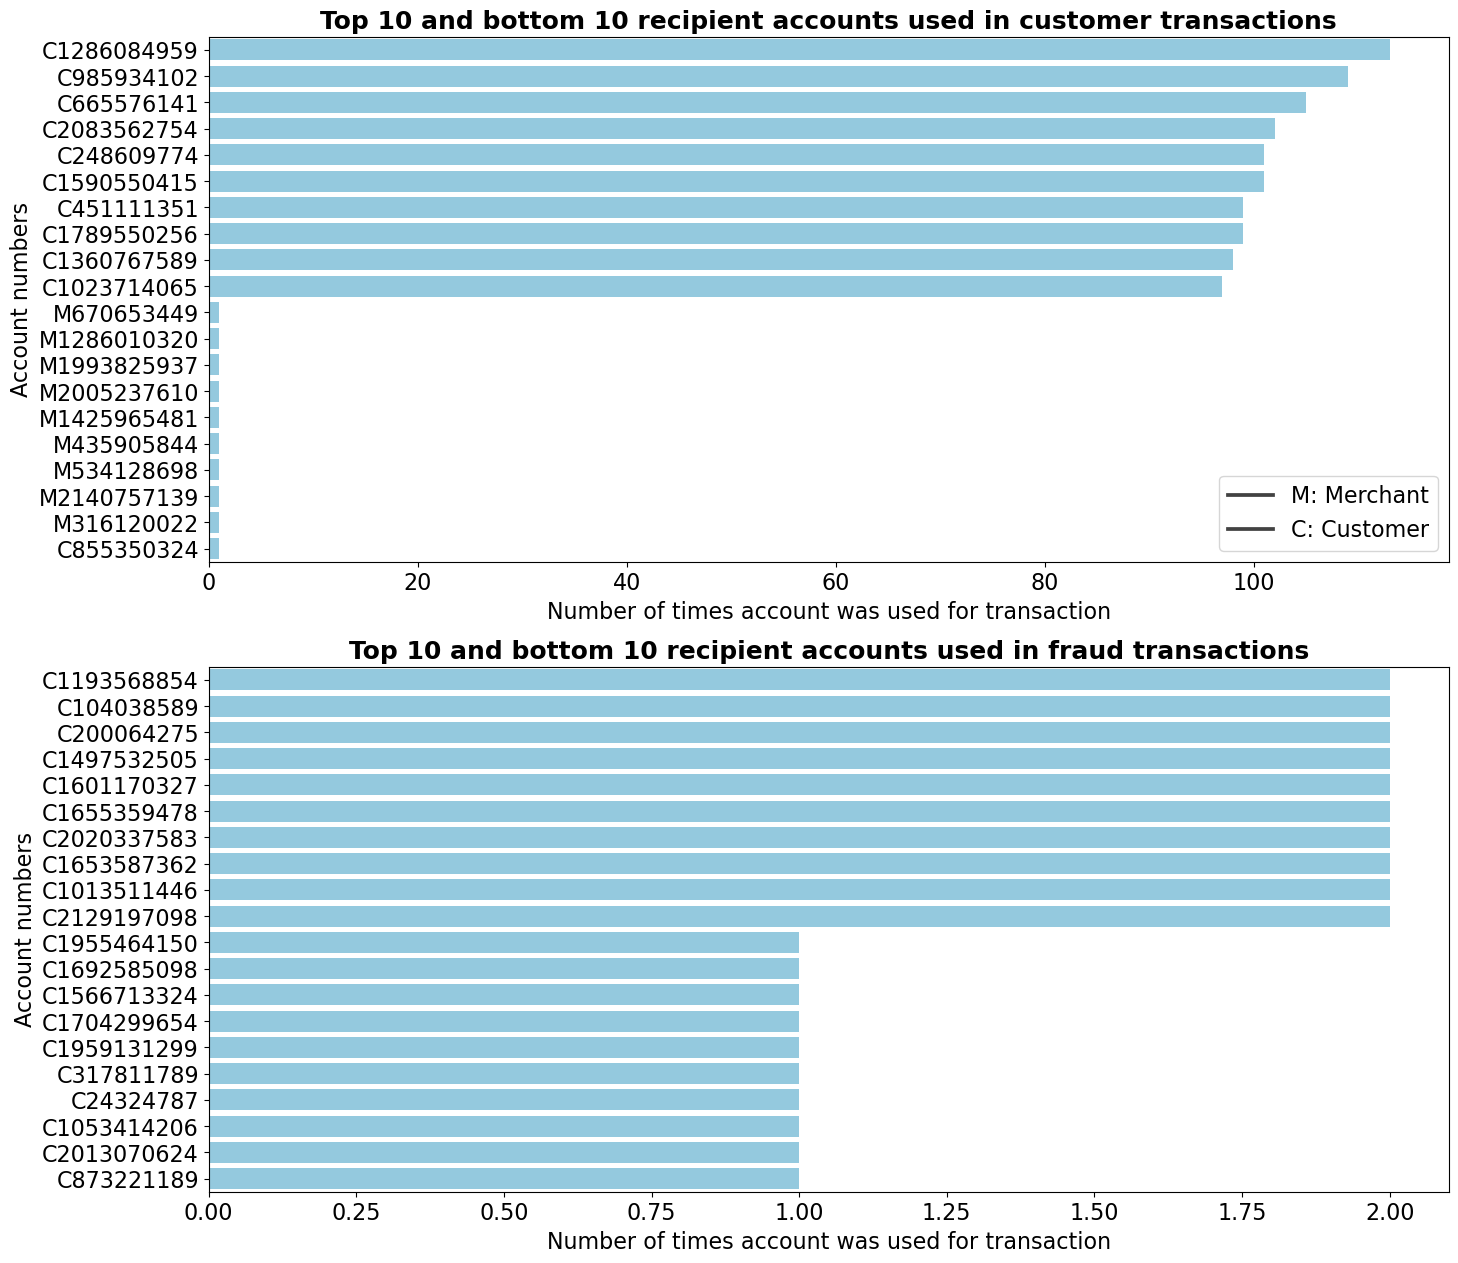

In [26]:
# figure size 
plt.figure(figsize = (16, 15))

# plot 1 
plt.subplot(2, 1, 1)
# bar plot showing top 10 and bottom 10 customer recipient accounts 
# bar plot 
sns.barplot( 
       # x
       merged_customer['times_used'], 
       # y 
       merged_customer['destination_account_number'],
    # color 
    color = 'skyblue')


# parameters 
## title 
plt.title('Top 10 and bottom 10 recipient accounts used in customer transactions', fontsize = 18, fontweight = 'bold')

## xlabel 
plt.xlabel('Number of times account was used for transaction', fontsize = 16)
## xaxis 
plt.xticks(fontsize = 16)

## ylabel 
plt.ylabel('Account numbers', fontsize = 16)
## yaxis 
plt.yticks(fontsize = 16)
## legend
plt.legend(['M: Merchant', 
            "C: Customer"], 
          fontsize = 16, 
          loc = 'lower right')

# plot 2 
plt.subplot(2, 1, 2)

# bar plot showing top 10 and bottom 10 fraud recipient accounts 
# bar plot 
# bar plot showing top 10 and bottom 10 fraud accounts



# bar plot 
sns.barplot( 
       # x
       merged_fraud['times_used'], 
       # y 
       merged_fraud['destination_account_number'],
    # color 
    color = 'skyblue')


# parameters 
## title 
plt.title('Top 10 and bottom 10 recipient accounts used in fraud transactions', fontsize = 18, fontweight = 'bold')

## xlabel 
plt.xlabel('Number of times account was used for transaction', fontsize = 16)
## xaxis 
plt.xticks(fontsize = 16)

## ylabel 
plt.ylabel('Account numbers', fontsize = 16)
## yaxis 
plt.yticks(fontsize = 16)

plt.show()

Very useful insight - "Merchant" accounts were never used in a fraud transaction. That could be a business rule for the model: if the recepient in transaction is a "Merchant" account, such transaction should not be flagged and stopped, unless there are factors like: unusual geolocation, suspicious activities, which I don't cover in this project. 

## Distribution of old and new accounts balances during fraud `Cash Out` transactions

In [27]:
# new dataframe that has old and new balances with only `Cash Out` transactions
sender_fraud_cashout = df[(df['isFraud'] == 1) & (df['type'] == 'CASH_OUT')]

# check 
sender_fraud_cashout

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


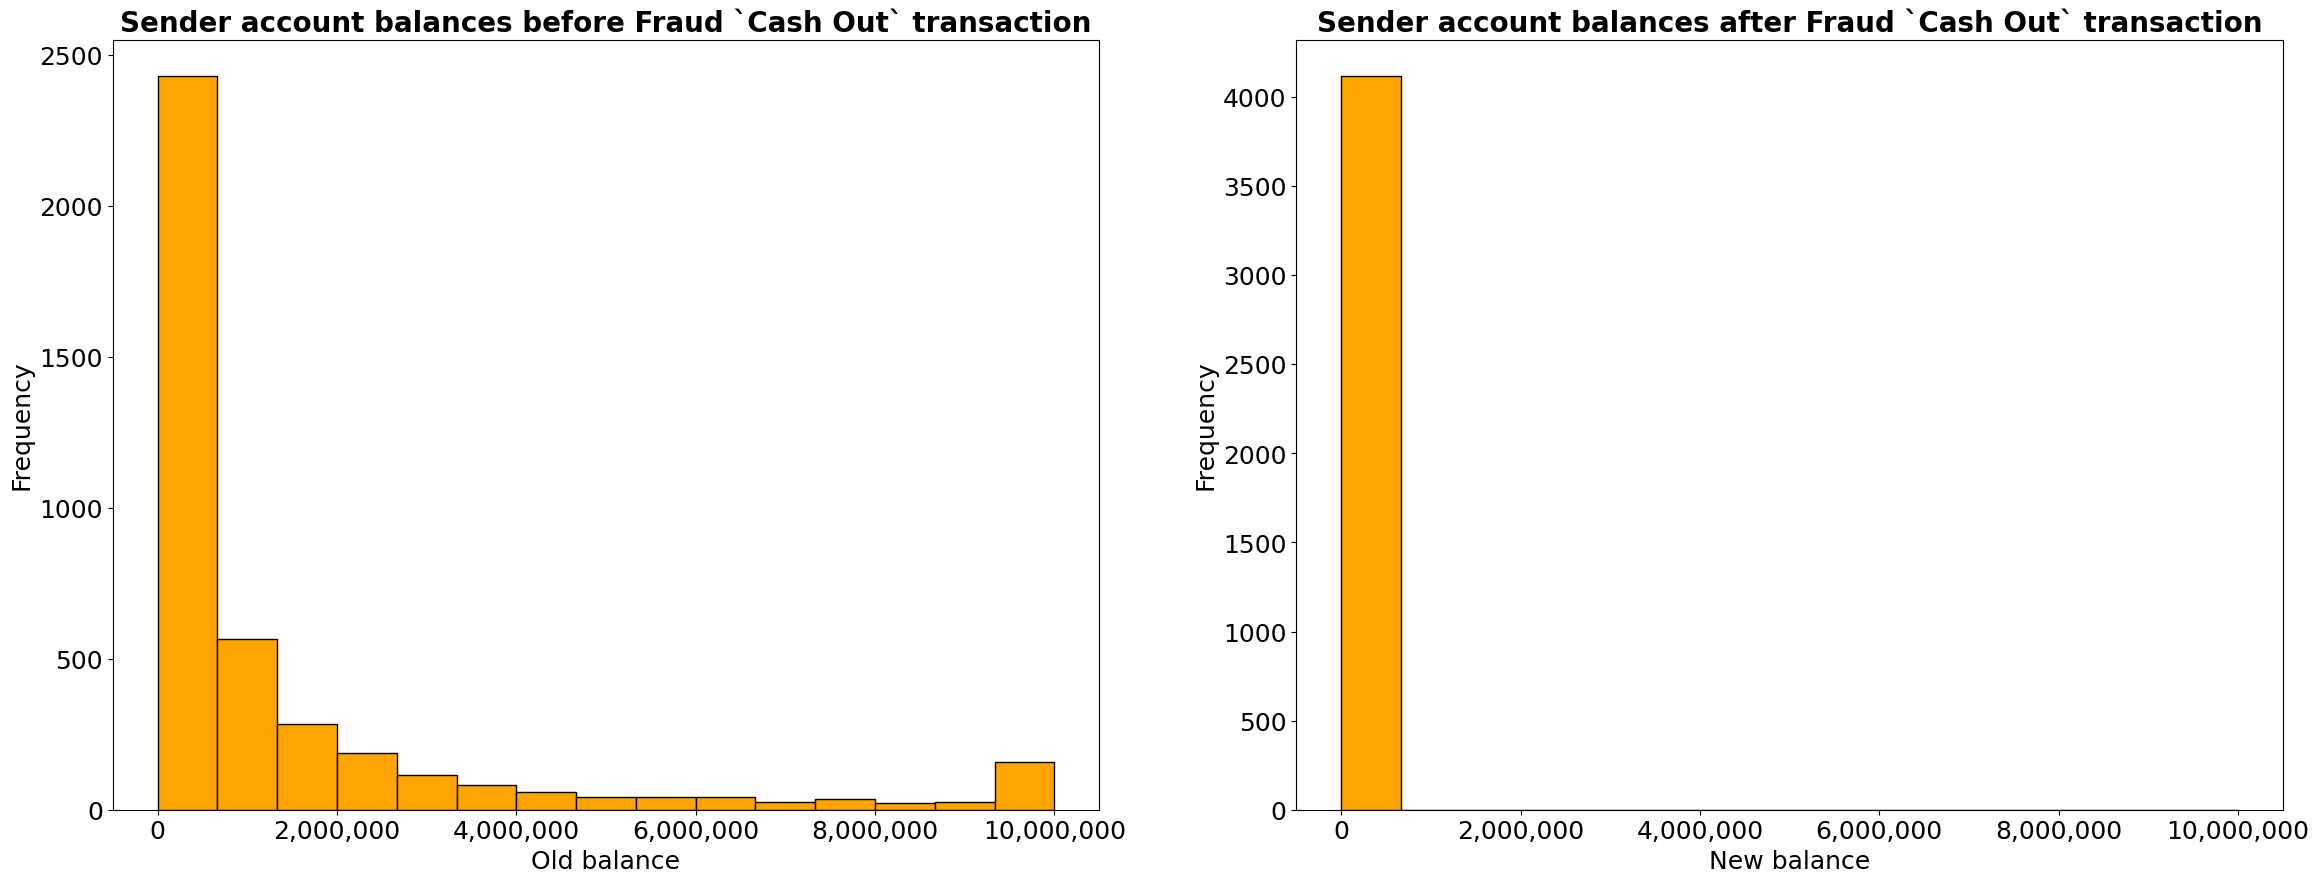

In [28]:
# graph size 
# length, height
plt.figure(figsize = (28, 10))
# 1st graph - distribution of old and new balance amounts of sender during the fraud cashout transactions
# 1st plot - sender account balances before Fraud transaction
plt.subplot(1, 2, 1)
# histogram plot
sender_fraud_cashout.oldbalanceOrg.plot(
    # figure type 
    kind = 'hist', 
    # number of bins
    bins = 15,
    # bin color
    facecolor = 'orange',
    # bin edge color
    edgecolor = 'black', 
     # range
    range = (0, 10000000)
)
# format of x axist to show full values
plt.ticklabel_format(style='plain', axis='x')  

# show values through coma
formats = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formats)

# parameters 
## title
plt.title("Sender account balances before Fraud `Cash Out` transaction", fontsize = 20, fontweight = 'bold')
## xlabel
plt.xlabel('Old balance', fontsize = 18)
## xticks 
plt.xticks(fontsize = 18)
## ylabel
plt.ylabel('Frequency', fontsize = 18)
## yticks
plt.yticks(fontsize = 18)

#2nd plot - sender account balances after Fraud transaction
plt.subplot(1, 2, 2)
# histogram plot
sender_fraud_cashout.newbalanceOrig.plot(
    # figure type 
    kind = 'hist', 
    # number of bins
    bins = 15,
    # bin color
    facecolor = 'orange',
    # bin edge color
    edgecolor = 'black',
     # range
   range = (0, 10000000)
)

# format of x axist to show full values
plt.ticklabel_format(style='plain', axis='x')  

# show values through coma
formats = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formats)

# parameters 
## title
plt.title("Sender account balances after Fraud `Cash Out` transaction", fontsize = 20, fontweight = 'bold')
## xlabel
plt.xlabel('New balance', fontsize = 18)
## xticks 
plt.xticks(fontsize = 18)
## ylabel
plt.ylabel('Frequency', fontsize = 18)
## yticks
plt.yticks(fontsize = 18)

plt.show()

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

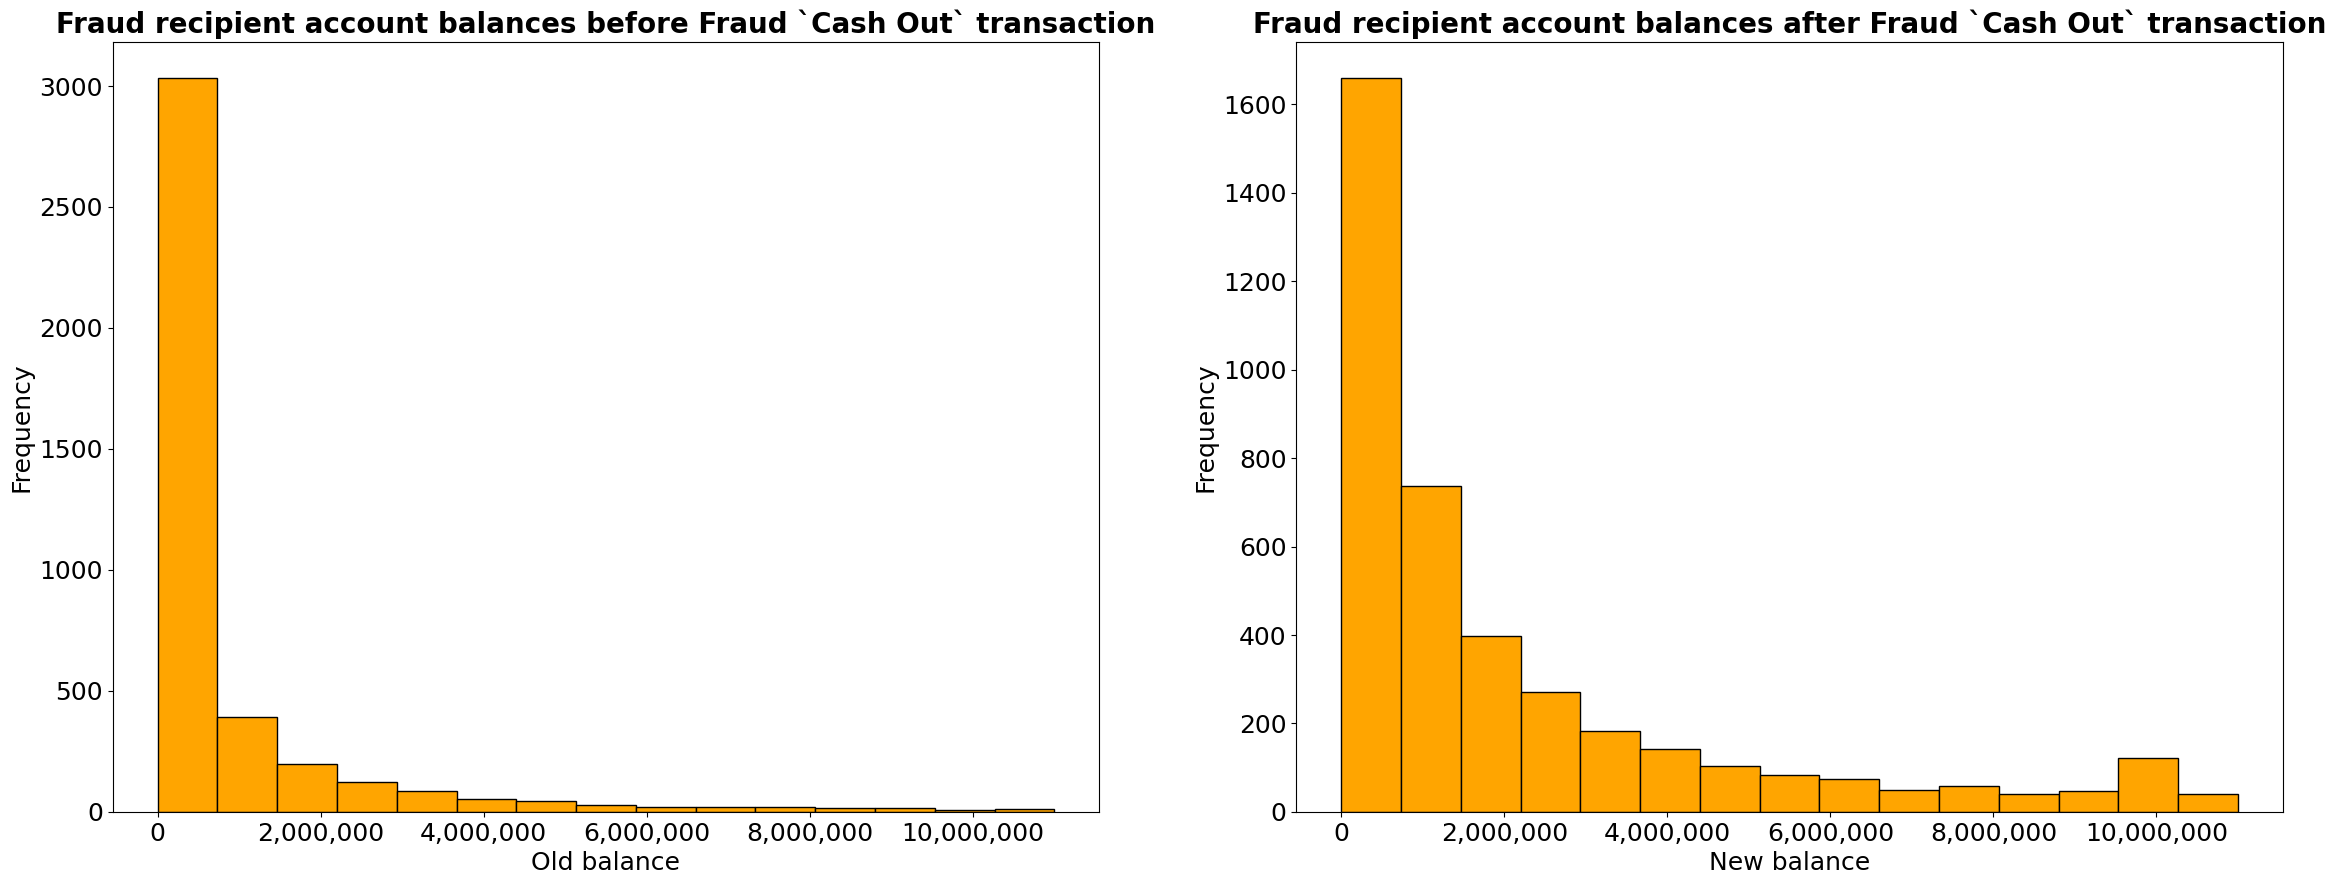

In [29]:
# graph size 
# length, height
plt.figure(figsize = (28, 10))
# 2nd graph - distribution of old and new balance amounts of fraud recipient accounts during the fraud cashout transactions
# 1st plot - fraud recipient account balances before Fraud transaction
plt.subplot(1, 2, 1)
# histogram plot
sender_fraud_cashout.oldbalanceDest.plot(
    # figure type 
    kind = 'hist', 
    # number of bins
    bins = 15,
    # bin color
    facecolor = 'orange',
    # bin edge color
    edgecolor = 'black',
     # range
    range = (0, 11000000)
)
# format of x axist to show full values
plt.ticklabel_format(style='plain', axis='x')  

# show values through coma
formats = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formats)

# parameters 
## title
plt.title("Fraud recipient account balances before Fraud `Cash Out` transaction", fontsize = 20, fontweight = 'bold')
## xlabel
plt.xlabel('Old balance', fontsize = 18)
## xticks 
plt.xticks(fontsize = 18)
## ylabel
plt.ylabel('Frequency', fontsize = 18)
## yticks
plt.yticks(fontsize = 18)

#2nd plot - fraud recipient account balances after Fraud transaction
plt.subplot(1, 2, 2)
# histogram plot
sender_fraud_cashout.newbalanceDest.plot(
    # figure type 
    kind = 'hist', 
    # number of bins
    bins = 15,
    # bin color
    facecolor = 'orange',
    # bin edge color
    edgecolor = 'black', 
     # range
   range = (0, 11000000)
)

# format of x axist to show full values
plt.ticklabel_format(style='plain', axis='x')  

# show values through coma
formats = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formats)

# parameters 
## title
plt.title("Fraud recipient account balances after Fraud `Cash Out` transaction", fontsize = 20, fontweight = 'bold')
## xlabel
plt.xlabel('New balance', fontsize = 18)
## xticks 
plt.xticks(fontsize = 18)
## ylabel
plt.ylabel('Frequency', fontsize = 18)
## yticks
plt.yticks(fontsize = 18)

## Distribution of old and new accounts balances during fraud `TRANSFER` transactions

In [30]:
# new dataframe that has old and new balances with only `TRANSFER` transactions
sender_fraud_transfer = df[(df['isFraud'] == 1) & (df['type'] == 'TRANSFER')]

# check 
sender_fraud_transfer

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,0


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

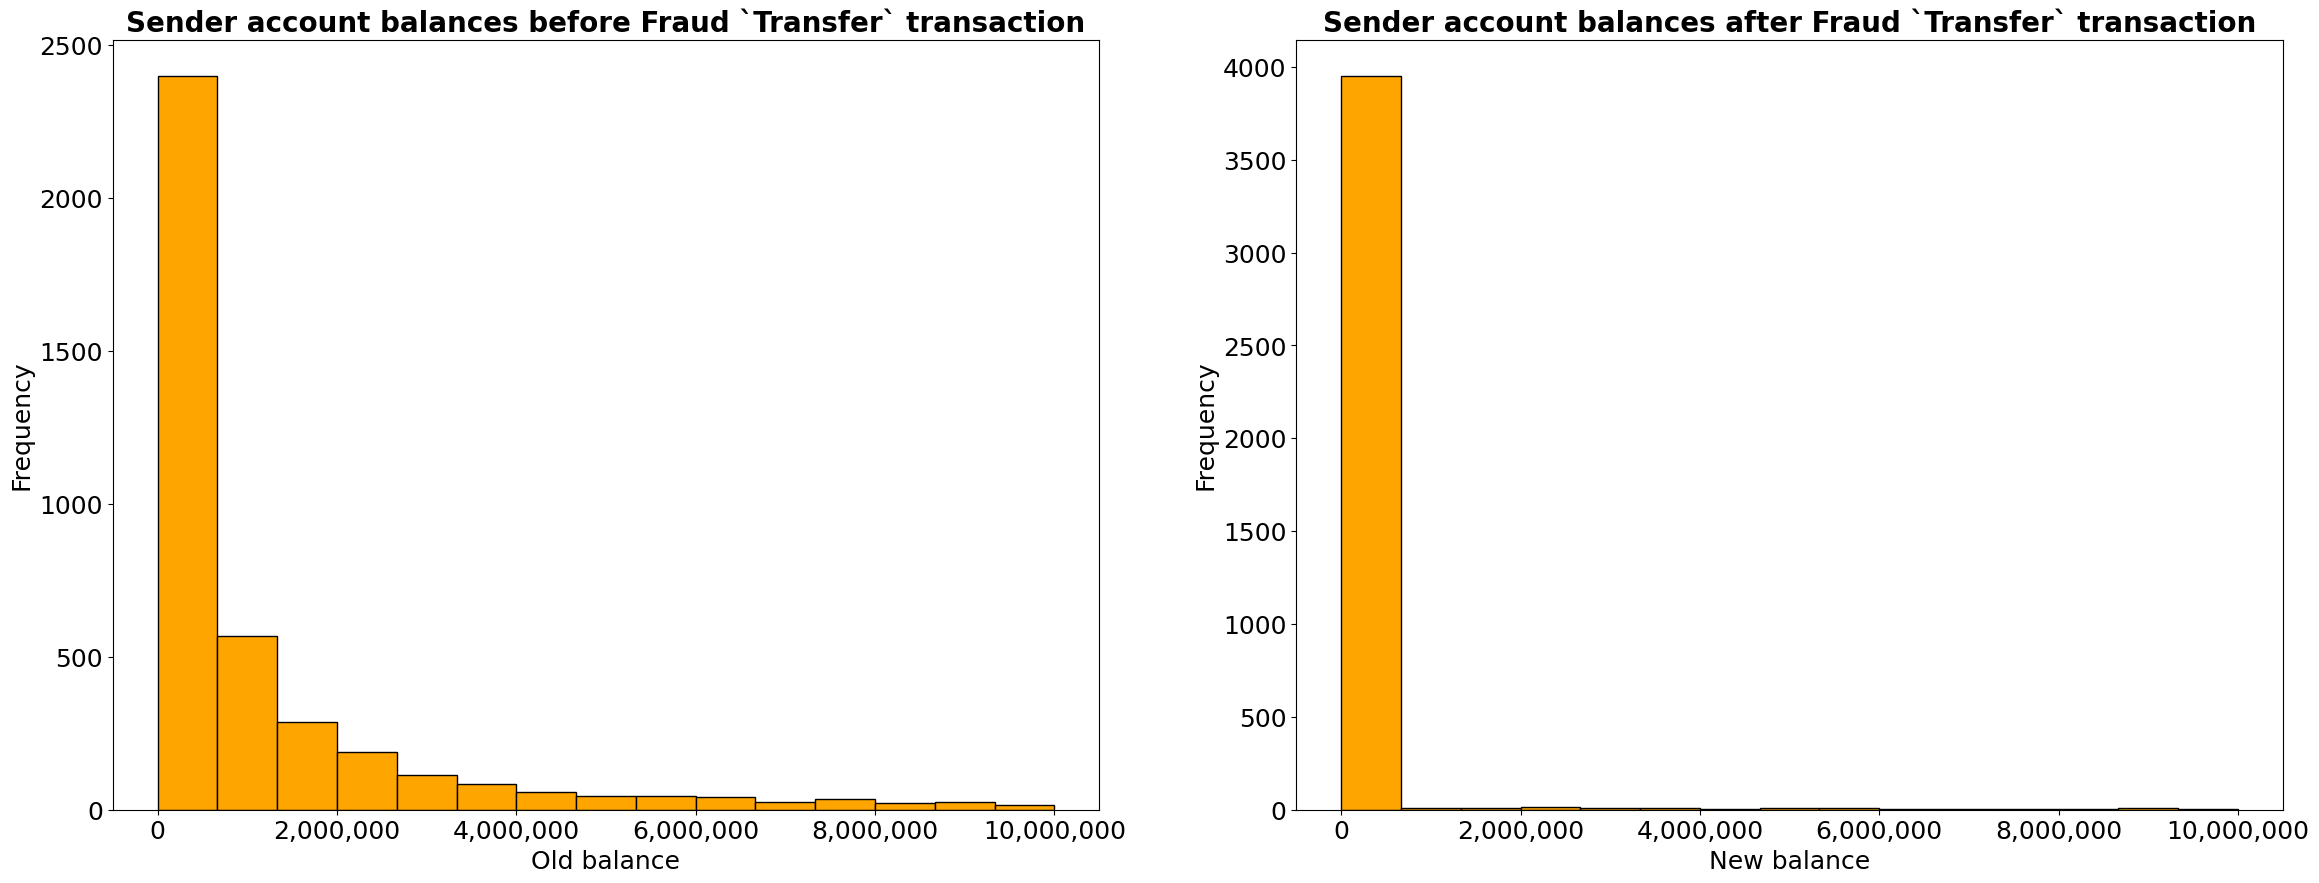

In [31]:
# graph size 
# length, height
plt.figure(figsize = (28, 10))
# 1st graph - distribution of old and new balance amounts of sender during the fraud transfer transactions
# 1st plot - sender account balances before Fraud transaction
plt.subplot(1, 2, 1)
# histogram plot
sender_fraud_transfer.oldbalanceOrg.plot(
    # figure type 
    kind = 'hist', 
    # number of bins
    bins = 15,
    # bin color
    facecolor = 'orange',
    # bin edge color
    edgecolor = 'black', 
     # range
    range = (0, 10000000)
)
# format of x axist to show full values
plt.ticklabel_format(style='plain', axis='x')  

# show values through coma
formats = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formats)

# parameters 
## title
plt.title("Sender account balances before Fraud `Transfer` transaction", fontsize = 20, fontweight = 'bold')
## xlabel
plt.xlabel('Old balance', fontsize = 18)
## xticks 
plt.xticks(fontsize = 18)
## ylabel
plt.ylabel('Frequency', fontsize = 18)
## yticks
plt.yticks(fontsize = 18)

#2nd plot - sender account balances after Fraud transaction
plt.subplot(1, 2, 2)
# histogram plot
sender_fraud_transfer.newbalanceOrig.plot(
    # figure type 
    kind = 'hist', 
    # number of bins
    bins = 15,
    # bin color
    facecolor = 'orange',
    # bin edge color
    edgecolor = 'black',
     # range
   range = (0, 10000000)
)

# format of x axist to show full values
plt.ticklabel_format(style='plain', axis='x')  

# show values through coma
formats = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formats)

# parameters 
## title
plt.title("Sender account balances after Fraud `Transfer` transaction", fontsize = 20, fontweight = 'bold')
## xlabel
plt.xlabel('New balance', fontsize = 18)
## xticks 
plt.xticks(fontsize = 18)
## ylabel
plt.ylabel('Frequency', fontsize = 18)
## yticks
plt.yticks(fontsize = 18)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

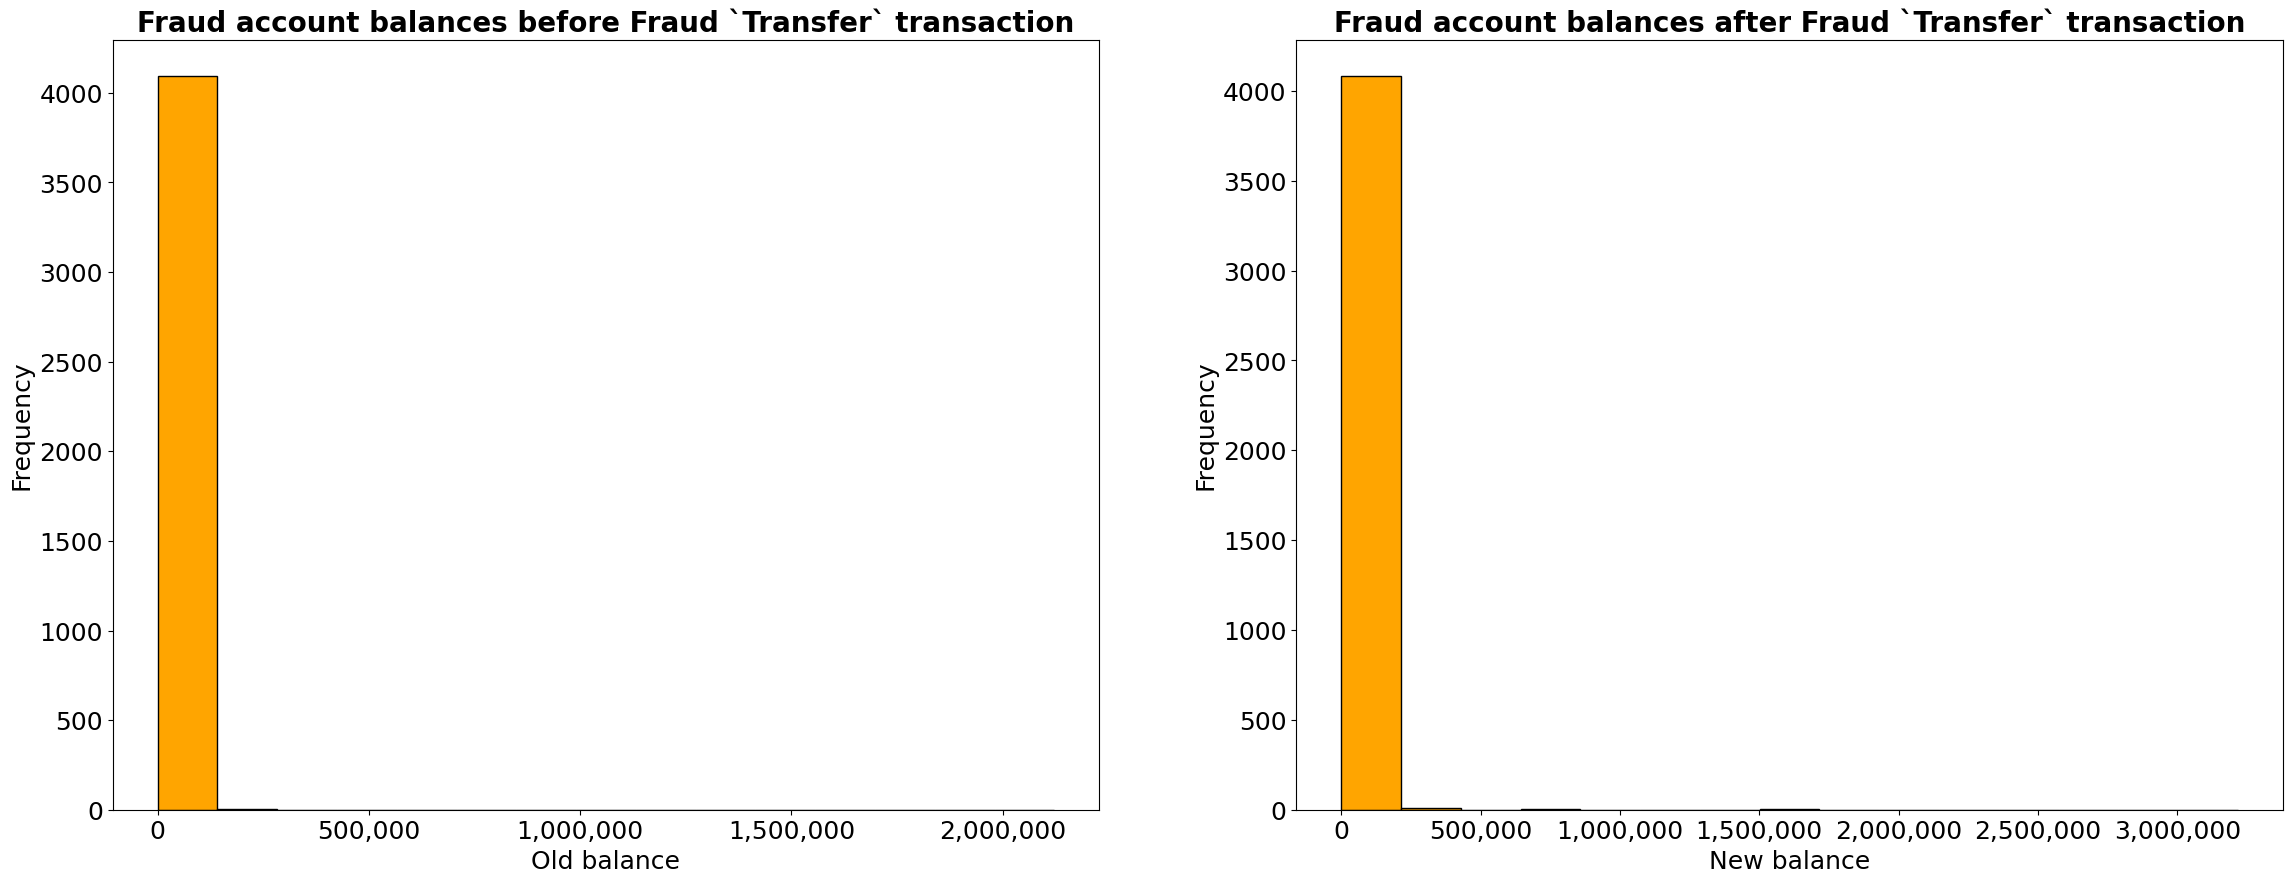

In [32]:
# graph size 
# length, height
plt.figure(figsize = (28, 10))
# 2nd graph - distribution of old and new balance amounts of fraudulent recipient during the fraud transfer transactions
# 1st plot - fraudulent account balances before Fraud transaction
plt.subplot(1, 2, 1)
# histogram plot
sender_fraud_transfer.oldbalanceDest.plot(
    # figure type 
    kind = 'hist', 
    # number of bins
    bins = 15,
    # bin color
    facecolor = 'orange',
    # bin edge color
    edgecolor = 'black'
     # range
   #range = (0, 1000000)
)
# format of x axist to show full values
plt.ticklabel_format(style='plain', axis='x')  

# show values through coma
formats = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formats)

# parameters 
## title
plt.title("Fraud account balances before Fraud `Transfer` transaction", fontsize = 20, fontweight = 'bold')
## xlabel
plt.xlabel('Old balance', fontsize = 18)
## xticks 
plt.xticks(fontsize = 18)
## ylabel
plt.ylabel('Frequency', fontsize = 18)
## yticks
plt.yticks(fontsize = 18)

#2nd plot - fraudulent account balances after Fraud transaction
plt.subplot(1, 2, 2)
# histogram plot
sender_fraud_transfer.newbalanceDest.plot(
    # figure type 
    kind = 'hist', 
    # number of bins
    bins = 15,
    # bin color
    facecolor = 'orange',
    # bin edge color
    edgecolor = 'black'
     # range
  #range = (0, 1000000)
)

# format of x axist to show full values
plt.ticklabel_format(style='plain', axis='x')  

# show values through coma
formats = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formats)

# parameters 
## title
plt.title("Fraud account balances after Fraud `Transfer` transaction", fontsize = 20, fontweight = 'bold')
## xlabel
plt.xlabel('New balance', fontsize = 18)
## xticks 
plt.xticks(fontsize = 18)
## ylabel
plt.ylabel('Frequency', fontsize = 18)
## yticks
plt.yticks(fontsize = 18)

Interesting question that needs to be answered is "How much money would have been saved if the fraud transactions had been detected and prevented earlier?"

In [35]:
# variable with only fraud transactions 
fraud_transactions = df[(df['isFraud'] == 1) & (df['isFlaggedFraud'] == 0)]

# total amount
total_fraud_amount = fraud_transactions['amount'].sum()

print(f"Total amount of money that would have been saved: {total_fraud_amount}$")

Total amount of money that would have been saved: 11978629864.15$


# Data cleaning 

## Remove uneccesary columns 


In [31]:
# information about the main variable with data 
df.info()

# columns that can't be used for classification algorithm training: 
# step - good for additional data visuzalition, but can't be used for predictions.

# nameOrig - can't be used for predictions as well,
## but provide useful information about accounts used. 

# isFlaggedFraud - explains how accurately did previous algorithm flag fraud transactions, shouldn't be used for 
## prediction as it will cause a data leakage. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [32]:
# create a variable that will be used for the rest of classification training
# copy df 
df_model = df.copy()

# list with columns that need to be removed 
remove_columns = ['step', 'nameOrig', 'isFlaggedFraud']

# remove columns 
df_model.drop(columns = remove_columns, axis = 1, inplace = True)

## Removing uneccesary rows

In this data, there might be one logical error which could lead to confusing predictions and outcomes - `transaction amount higher than the balance amount possible`. If exclude such factors as credits, over-limit pay, this case is not logical and relevant for fraud detection.

In [33]:
# check how many rows are there with amount higher than balance
rows = df_model[df_model['amount'] > df_model['oldbalanceOrg']]

# check 
rows.shape[0]

4079080

In [34]:
# check how many fraud transactions are there
rows_fraud = rows[rows['isFraud'] == 1]

# check 
rows_fraud.shape[0]

29

In [35]:
# show these fraud rows 
rows_fraud

,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
724,CASH_OUT,416001.33,0.00,0.0,C667346055,102.00,9291619.62,1
1911,CASH_OUT,132842.64,4499.08,0.0,C297927961,0.00,132842.64,1
14861,CASH_OUT,181728.11,0.00,0.0,C789014007,11397.00,184477.77,1
25875,TRANSFER,1078013.76,0.00,0.0,C277510102,0.00,970749.68,1
77745,CASH_OUT,277970.88,0.00,0.0,C571514738,0.00,277970.88,1
138559,TRANSFER,1933920.80,0.00,0.0,C461905695,1283762.85,3217683.65,1
169998,CASH_OUT,149668.66,0.00,0.0,C460735540,44170.11,193838.76,1
178668,CASH_OUT,222048.71,0.00,0.0,C1700442291,2979.00,225027.71,1
200845,CASH_OUT,454859.39,0.00,0.0,C2146670328,0.00,454859.39,1
217978,TRANSFER,123194.95,79466.45,0.0,C1755380031,535933.16,263908.84,1


There are ~4 million rows and from these 4 millions, there are only 29 fraud transactions where the amount of transaction is higher than the balance. However, after the exploration it actually might make sense. 
1) Fraudster focused on an account with 0 balance

2) If there is some balance on consumer account, such fraudster transaction resulted in full depletion of balance reserves. 

To be safe, I am going to delete such non-fraud rows, while leaving 29 fraud rows in the data. 

In [36]:
# clean 
df_model = df_model[~((df_model['amount'] > df_model['oldbalanceOrg']))]


In [37]:
# check whether worked 
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2283540 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   nameDest        object 
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 156.8+ MB


In [38]:
# check whether there is still these 29 rows 
df_model[(df_model['amount'] > df_model['oldbalanceOrg']) & df_model['isFraud'] == 1]

,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud


Other types of data cleaning such as converting to dummy variables, z-normalization, or outliers can't be done before data partitioning, as it might introduce data leakage. 

# Data Partitioning 
I will split my data into `training`, and `validation` subsets. 

`training` - will be used training algorithms with the data.

`validation` - will be used to test accuracy of models, choose the best model and tune it.


In [39]:
# x and y variables 
y = df_model['isFraud']
x = df_model.drop(columns = ['isFraud'])

Due to the fact that our data is very large(~2million rows), I might have to reduce the data by reducing number of non-fraud transactions (there are only ~8000 fraud records, the rest is non-fraud).

In [40]:
## convert index variable to dataframe
y_index = y.to_frame()

# non-fraud rows 
non_fraud_rows = y_index[y_index['isFraud'] == 0].index 

# percentage of removal 
percentage_remove = 0.50

# calculate number of exact number of rows that are going to be removed
rows = int(len(non_fraud_rows)*percentage_remove)

print(f"Number of rows that are going to be removed:{rows}")

Number of rows that are going to be removed:1137678


In [41]:
# random selection of non-fraud rows 
rows_remove = non_fraud_rows.to_series().sample(n = rows, random_state = 1042).index 

# apply on x and y 
x_reduced = x.drop(index = rows_remove)
y_reduced = y.drop(index = rows_remove)

In [42]:
# info about data
x_reduced.info()
# 1145891 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1145862 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1145862 non-null  object 
 1   amount          1145862 non-null  float64
 2   oldbalanceOrg   1145862 non-null  float64
 3   newbalanceOrig  1145862 non-null  float64
 4   nameDest        1145862 non-null  object 
 5   oldbalanceDest  1145862 non-null  float64
 6   newbalanceDest  1145862 non-null  float64
dtypes: float64(5), object(2)
memory usage: 69.9+ MB


In [43]:
# split data into training, and validation data
train_x, valid_x, train_y, valid_y = train_test_split(
    x_reduced, y_reduced, test_size = 0.4, random_state = 1042)

In [44]:
# train dataset
print('Training dataset:')
train_x.info()

Training dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 687517 entries, 2122613 to 12901
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   type            687517 non-null  object 
 1   amount          687517 non-null  float64
 2   oldbalanceOrg   687517 non-null  float64
 3   newbalanceOrig  687517 non-null  float64
 4   nameDest        687517 non-null  object 
 5   oldbalanceDest  687517 non-null  float64
 6   newbalanceDest  687517 non-null  float64
dtypes: float64(5), object(2)
memory usage: 42.0+ MB


In [45]:
# validation dataset
print('Validation dataset:')
valid_x.info()

Validation dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 458345 entries, 4544525 to 2692077
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   type            458345 non-null  object 
 1   amount          458345 non-null  float64
 2   oldbalanceOrg   458345 non-null  float64
 3   newbalanceOrig  458345 non-null  float64
 4   nameDest        458345 non-null  object 
 5   oldbalanceDest  458345 non-null  float64
 6   newbalanceDest  458345 non-null  float64
dtypes: float64(5), object(2)
memory usage: 28.0+ MB


Before I start cleaning each data subset, I want to make initial test of models performance with this state of data. 
At first, I will use logistic regression and single decision tree models without any tuning. 

In [46]:
# list that will have all possible models 
models = []

# append models that are going to be used 
## logistic regression
models.append(('Logistic Regression', LogisticRegression(max_iter = 1000)))
## decision tree
models.append(('Single Decision Tree', DecisionTreeClassifier(random_state = 1042)))

# function to test performance of the model
def models_test(x, y, models, train_x, train_y, valid_x, valid_y):
  for name, model in models:
    # fit the model
    model.fit(train_x, train_y)
    
    # statistics for training data 
    print(f"Model {name} training Accuracy: {accuracy_score(train_y, model.predict(train_x)):.4f}")
    print(f"Model {name} training Precision: {precision_score(train_y, model.predict(train_x)):.4f}")
    print(f"Model {name} training Recall: {recall_score(train_y, model.predict(train_x)):.4f}")
    print(f"Model {name} training F1 Score: {f1_score(train_y, model.predict(train_x)):.4f}")
    ## ROC curve 
    ROC = model.predict_proba(train_x)[:, 1]
    print(f"Model {name} training ROC AUC: {roc_auc_score(train_y, ROC):.4f}")
    print()
    
    # classification summary for training data 
    classificationSummary(train_y,  model.predict(train_x))
    
    # statistics for validation data
    print(f"Model {name} validation Accuracy: {accuracy_score(valid_y, model.predict(valid_x)):.4f}")
    print(f"Model {name} validation Precision: {precision_score(valid_y, model.predict(valid_x)):.4f}")
    print(f"Model {name} validation Recall: {recall_score(valid_y, model.predict(valid_x)):.4f}")
    print(f"Model {name} validation F1 Score: {f1_score(valid_y, model.predict(valid_x)):.4f}")
    ## ROC curve 
    ROC = model.predict_proba(valid_x)[:, 1]
    print(f"Model {name} validation ROC AUC: {roc_auc_score(valid_y, ROC):.4f}")
    print()
        
    # classification summary for validation data 
    classificationSummary(valid_y, model.predict(valid_x))

    
    # Kfolds cross-validation 
    ## create cross-validation parameter (how many folds)
    cv = StratifiedKFold(n_splits = 5, 
                        shuffle = True, 
                        random_state = 1042)

    ## apply cross-validation statistics for data
    print(f"Model {name} Average cross-validation Accuracy: {cross_val_score(model,x, y, cv = 5, scoring = 'accuracy', n_jobs = -1).mean():.4f}")
    print(f"Model {name} Average cross-validation Precision: {cross_val_score(model,x, y, cv = 5, scoring = 'precision', n_jobs = -1).mean():.4f}")
    print(f"Model {name} Average cross-validation Recall: {cross_val_score(model,x, y, cv = 5, scoring = 'recall', n_jobs = -1).mean():.4f}")
    print(f"Model {name} Average cross-validation F1 Score: {cross_val_score(model,x, y, cv = 5, scoring = 'f1', n_jobs = -1).mean():.4f}")
    
    print('--------------------------------------------------------------------')

In [47]:
# I am going to remove type object variable to test performance with only numeric variables at first 
## remove type variable 
x_copy = x_reduced.copy()

x_copy.drop(columns = ['type','nameDest'], axis = 1, inplace = True)

# split data into training, and validation data
train_x, valid_x, train_y, valid_y = train_test_split(
    x_copy, y_reduced, test_size = 0.4, random_state = 1042)

## test the model 
models_test(x_copy, y_reduced, models, train_x, train_y, valid_x, valid_y)

Model Logistic Regression training Accuracy: 0.9963
Model Logistic Regression training Precision: 0.8903
Model Logistic Regression training Recall: 0.5441
Model Logistic Regression training F1 Score: 0.6754
Model Logistic Regression training ROC AUC: 0.9789

Confusion Matrix (Accuracy 0.9963)

       Prediction
Actual      0      1
     0 682283    329
     1   2236   2669
Model Logistic Regression validation Accuracy: 0.9961
Model Logistic Regression validation Precision: 0.8999
Model Logistic Regression validation Recall: 0.5154
Model Logistic Regression validation F1 Score: 0.6554
Model Logistic Regression validation ROC AUC: 0.9785

Confusion Matrix (Accuracy 0.9961)

       Prediction
Actual      0      1
     0 454878    188
     1   1589   1690
Model Logistic Regression Average cross-validation Accuracy: 0.9958
Model Logistic Regression Average cross-validation Precision: 0.8594
Model Logistic Regression Average cross-validation Recall: 0.5390
Model Logistic Regression Average c

Without any tuning or critical data cleaning, decision tree already has a much better performance than logistic regression, even if decision tree is full-grown and clearly overfits to the training data. I am going to use decision trees models only if I wouldn't be able to improve the results of logistic regression. It is preffered to use logistic regression, as it easier to make regression interpretable and explainable in complex data. 

# Data Normalization / Scaling 

In [48]:
# statistics about predictor variables 
x_copy.describe()



,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,1.145862e+06,1.145862e+06,1.145862e+06,1.145862e+06,1.145862e+06
mean,8.827244e+04,2.291875e+06,2.326684e+06,9.072873e+05,8.730499e+05
std,2.586134e+05,4.460921e+06,4.512611e+06,2.887001e+06,2.881792e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.280702e+03,5.365257e+04,3.825763e+04,0.000000e+00,0.000000e+00
50%,2.380047e+04,2.364182e+05,2.020774e+05,0.000000e+00,1.614095e+04
75%,1.187135e+05,2.464495e+06,2.600823e+06,7.144960e+05,6.216377e+05
max,1.000000e+07,5.958504e+07,4.958504e+07,3.114049e+08,3.114929e+08


I am going to apply 2 types of scaling to numeric data: 
1) standard z normalization 

2) min-max normalization

I will choose normalization type that produces better results with decision trees. 

## Not normalized vs Z-normalized

In [49]:
# library for pipelines
from sklearn.pipeline import Pipeline

# list that will have all possible models 
models = []

# pipelines 
tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('decision_tree', DecisionTreeClassifier(random_state=1042))
])

logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('logistic_regression', LogisticRegression())
])

# append models that are going to be used 
## decision tree
models.append(('Single Decision Tree', DecisionTreeClassifier(random_state = 1042)))
models.append(('Single Decision Tree (standardized)', tree_pipeline))

## logistic 
models.append(('Logistic Regression (standardized)', logistic_pipeline))


In [50]:
# test raw vs z-normalized 
models_test(x_copy, y_reduced, models, train_x, train_y, valid_x, valid_y)

Model Single Decision Tree training Accuracy: 1.0000
Model Single Decision Tree training Precision: 1.0000
Model Single Decision Tree training Recall: 1.0000
Model Single Decision Tree training F1 Score: 1.0000
Model Single Decision Tree training ROC AUC: 1.0000

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual      0      1
     0 682612      0
     1      0   4905
Model Single Decision Tree validation Accuracy: 1.0000
Model Single Decision Tree validation Precision: 0.9994
Model Single Decision Tree validation Recall: 0.9991
Model Single Decision Tree validation F1 Score: 0.9992
Model Single Decision Tree validation ROC AUC: 0.9995

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual      0      1
     0 455064      2
     1      3   3276
Model Single Decision Tree Average cross-validation Accuracy: 1.0000
Model Single Decision Tree Average cross-validation Precision: 0.9979
Model Single Decision Tree Average cross-validation Recall: 0.9993
Model Single Decision 

Decision tree has actually worse results when used with standardization. That means it is better to use decision tree without the standardization, unless if min-max standardization will show better results. Logistic regression has still less performance on validation data and recall rate worsened after the standardization too.

Accuracy metric is also not useful to me in this data, because it converges to 1 indifferently to any data transformation. I will focus on other three (Precision, Recall, F1 score) metrics in validation and cross-validation. 

## Z-Normalized vs Min-Max Normalized 


In [51]:
# list that will have all possible models 
models = []

# pipelines 
tree_pipeline = Pipeline([
    ('decision_tree', DecisionTreeClassifier(random_state=1042))
])

tree_pipeline_minmax = Pipeline([
    ('scaler', MinMaxScaler() ), 
    ('decision_tree', DecisionTreeClassifier(random_state = 1042))
])

logistic_pipeline_minmax = Pipeline([
    ('scaler', MinMaxScaler()),  
    ('logistic_regression', LogisticRegression())
])

# append models that are going to be used 
## decision tree
models.append(('Single Decision Tree', tree_pipeline))
models.append(('Single Decision Tree (min-max normalization)', tree_pipeline_minmax))

## logistic 
models.append(('Logistic Regression (min-max normalization)', logistic_pipeline_minmax))


In [52]:
# test normalized vs min-max normalized 
models_test(x_copy, y_reduced, models, train_x, train_y, valid_x, valid_y)

Model Single Decision Tree training Accuracy: 1.0000
Model Single Decision Tree training Precision: 1.0000
Model Single Decision Tree training Recall: 1.0000
Model Single Decision Tree training F1 Score: 1.0000
Model Single Decision Tree training ROC AUC: 1.0000

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual      0      1
     0 682612      0
     1      0   4905
Model Single Decision Tree validation Accuracy: 1.0000
Model Single Decision Tree validation Precision: 0.9994
Model Single Decision Tree validation Recall: 0.9991
Model Single Decision Tree validation F1 Score: 0.9992
Model Single Decision Tree validation ROC AUC: 0.9995

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual      0      1
     0 455064      2
     1      3   3276
Model Single Decision Tree Average cross-validation Accuracy: 1.0000
Model Single Decision Tree Average cross-validation Precision: 0.9979
Model Single Decision Tree Average cross-validation Recall: 0.9993
Model Single Decision 

Min-max normalization is clearly worse than z-normalization and no normalization for this data for both models. The possible reason is that numerical variables of this data are very right-skewed and have big ranges, z normalization is better for columns with different ranges. 


Based on the results, no normalization is better both for logistic regression and decision tree, so I am not going to use any type of normalization for deicision tree, but it is recommended to use z-normalization for logistic regression. 

# Categorical variables into Dummy variables
I am going to convert categorical variable - `Type` into dummy variable in x_copy. If this transformation improves predictive of power of models, I will transform `Type` in the main x_reduced variable. 

In [53]:
# make a copy of x_reduced variable again without dropping type column
x_copy = x_reduced.copy()


In [54]:
# information about x_copy
x_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1145862 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1145862 non-null  object 
 1   amount          1145862 non-null  float64
 2   oldbalanceOrg   1145862 non-null  float64
 3   newbalanceOrig  1145862 non-null  float64
 4   nameDest        1145862 non-null  object 
 5   oldbalanceDest  1145862 non-null  float64
 6   newbalanceDest  1145862 non-null  float64
dtypes: float64(5), object(2)
memory usage: 69.9+ MB


From the data exploration part, I learned that Merchants in `nameDest` are always not Fraud, I am going to transform this variable and convert this columns to use it efficiently. I am going to rename every row in this column to either `Consumer` or `Merchant`, and then I will convert this column to dummy variable. 

In [55]:
# convert rows in the column 
x_copy['nameDest'] = np.where(x_copy['nameDest'].str.startswith('C'), 'Consumer', 
                             np.where(x_copy['nameDest'].str.startswith('M'), 'Merchant', x_copy['nameDest']))

# check 
x_copy.head()

,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,PAYMENT,9839.64,170136.0,160296.36,Merchant,0.0,0.0
1,PAYMENT,1864.28,21249.0,19384.72,Merchant,0.0,0.0
2,TRANSFER,181.00,181.0,0.00,Consumer,0.0,0.0
3,CASH_OUT,181.00,181.0,0.00,Consumer,21182.0,0.0
4,PAYMENT,11668.14,41554.0,29885.86,Merchant,0.0,0.0


In [56]:
# convert `type` to dummy
x_copy = pd.get_dummies(x_copy, drop_first = True)

In [57]:
# partition the data 
train_x, valid_x, train_y, valid_y = train_test_split(
    x_copy, y_reduced, test_size = 0.40, random_state = 1042)

In [59]:
# check
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687517 entries, 2122613 to 12901
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   amount             687517 non-null  float64
 1   oldbalanceOrg      687517 non-null  float64
 2   newbalanceOrig     687517 non-null  float64
 3   oldbalanceDest     687517 non-null  float64
 4   newbalanceDest     687517 non-null  float64
 5   type_CASH_OUT      687517 non-null  uint8  
 6   type_DEBIT         687517 non-null  uint8  
 7   type_PAYMENT       687517 non-null  uint8  
 8   type_TRANSFER      687517 non-null  uint8  
 9   nameDest_Merchant  687517 non-null  uint8  
dtypes: float64(5), uint8(5)
memory usage: 34.8 MB


In [60]:
# data rows 
train_x.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_Merchant
2122613,180821.38,3401538.73,3582360.10,1857943.23,1677121.85,0,0,0,0,0
4486532,37622.60,1598811.11,1636433.71,95064.21,57441.61,0,0,0,0,0
4305264,85323.89,11474070.89,11559394.78,172909.95,87586.06,0,0,0,0,0
2454200,426149.05,750013.95,1176163.00,2962209.25,2536060.19,0,0,0,0,0
1039716,5111.63,11466.00,6354.37,0.00,0.00,0,0,1,0,1


In [61]:
# check 
valid_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458345 entries, 4544525 to 2692077
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   amount             458345 non-null  float64
 1   oldbalanceOrg      458345 non-null  float64
 2   newbalanceOrig     458345 non-null  float64
 3   oldbalanceDest     458345 non-null  float64
 4   newbalanceDest     458345 non-null  float64
 5   type_CASH_OUT      458345 non-null  uint8  
 6   type_DEBIT         458345 non-null  uint8  
 7   type_PAYMENT       458345 non-null  uint8  
 8   type_TRANSFER      458345 non-null  uint8  
 9   nameDest_Merchant  458345 non-null  uint8  
dtypes: float64(5), uint8(5)
memory usage: 23.2 MB


In [62]:
# data rows 
valid_x.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_Merchant
4544525,30185.02,167656.00,137470.98,0.00,0.00,0,0,1,0,1
2212018,531346.79,3111959.43,3643306.22,4751930.73,3910486.42,0,0,0,0,0
4727737,3324.38,58082.87,54758.49,0.00,0.00,0,0,1,0,1
5919277,319390.80,3372715.40,3692106.21,615357.02,295966.21,0,0,0,0,0
3584576,14009.50,739835.00,725825.50,0.00,0.00,0,0,1,0,1


In [63]:
# list that will have all possible models 
models = []

# pipelines 
tree_pipeline = Pipeline([
    ('decision_tree', DecisionTreeClassifier(random_state=1042))
])

logistic_pipeline_z = Pipeline([
    ('scaler', StandardScaler()),  
    ('logistic_regression', LogisticRegression(random_state=1042))
])
    
    
## decision tree
models.append(('Single Decision Tree', tree_pipeline))
    
## logistic 
models.append(('Logistic Regression (standardized)', logistic_pipeline_z))


In [64]:
# test decision tree with dummy variables  
models_test(x_copy, y_reduced, models, train_x, train_y, valid_x, valid_y)

Model Single Decision Tree training Accuracy: 1.0000
Model Single Decision Tree training Precision: 1.0000
Model Single Decision Tree training Recall: 1.0000
Model Single Decision Tree training F1 Score: 1.0000
Model Single Decision Tree training ROC AUC: 1.0000

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual      0      1
     0 682612      0
     1      0   4905
Model Single Decision Tree validation Accuracy: 1.0000
Model Single Decision Tree validation Precision: 0.9991
Model Single Decision Tree validation Recall: 0.9991
Model Single Decision Tree validation F1 Score: 0.9991
Model Single Decision Tree validation ROC AUC: 0.9995

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual      0      1
     0 455063      3
     1      3   3276
Model Single Decision Tree Average cross-validation Accuracy: 1.0000
Model Single Decision Tree Average cross-validation Precision: 0.9989
Model Single Decision Tree Average cross-validation Recall: 0.9993
Model Single Decision 

Dummy variables improved validation metrics in decision tree model. There is an increase in all metrics in cross-validation metrics, which is a good sign. However, there was no improvement in logistic regression model. Oppositely, the results became worse. As there is an improvement in results of decision tree, I will copy all of the results to main variable - x_reduced. Decision tree is better for such data, that's why I will use and tune decision tree only from now on. 

In [65]:
# copy changed in x_copy
x_reduced = x_copy.copy()

In [66]:
# check 
x_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1145862 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   amount             1145862 non-null  float64
 1   oldbalanceOrg      1145862 non-null  float64
 2   newbalanceOrig     1145862 non-null  float64
 3   oldbalanceDest     1145862 non-null  float64
 4   newbalanceDest     1145862 non-null  float64
 5   type_CASH_OUT      1145862 non-null  uint8  
 6   type_DEBIT         1145862 non-null  uint8  
 7   type_PAYMENT       1145862 non-null  uint8  
 8   type_TRANSFER      1145862 non-null  uint8  
 9   nameDest_Merchant  1145862 non-null  uint8  
dtypes: float64(5), uint8(5)
memory usage: 57.9 MB


# Target class over-sampling
Next step to try and improve the model is to oversample the number of fraud transactions in the data. Currently, there are only ~8000 rows in the data that correspond to fraud transactions. This might have been worsening the prediction power of models. 

I will use 2 methods of oversampling: 
1) SMOTE: Synthetic Minority Oversampling Technique

2) ADASYN: Adaptive Synthetic Sampling Approach

Best Oversampling method will be chosen based on validation and cross-validation metrics.

( There are much better combined-hybrid oversampling techniques that give better performance, however they are computationally expensive and can't be done on millions of rows without additional resources which I don't have)

## SMOTE 

In [67]:
# library for oversampling
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline

# list that will have all possible models 
models = []

# pipelines 
tree_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state = 1042)), 
    ('decision_tree', DecisionTreeClassifier(random_state=1042))
])

# append models that are going to be used 
## decision tree
models.append(('Single Decision Tree', tree_pipeline))

In [68]:
# partition the data 
train_x, valid_x, train_y, valid_y = train_test_split(
    x_reduced, y_reduced, test_size = 0.40, random_state = 1042)

Previous result: 
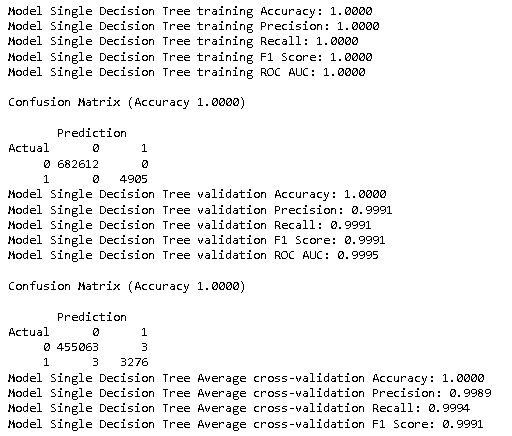

In [69]:
# test decision tree (SMOTE method)
models_test(x_reduced, y_reduced, models, train_x, train_y, valid_x, valid_y)

Model Single Decision Tree training Accuracy: 1.0000
Model Single Decision Tree training Precision: 1.0000
Model Single Decision Tree training Recall: 1.0000
Model Single Decision Tree training F1 Score: 1.0000
Model Single Decision Tree training ROC AUC: 1.0000

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual      0      1
     0 682612      0
     1      0   4905
Model Single Decision Tree validation Accuracy: 1.0000
Model Single Decision Tree validation Precision: 0.9997
Model Single Decision Tree validation Recall: 0.9991
Model Single Decision Tree validation F1 Score: 0.9994
Model Single Decision Tree validation ROC AUC: 0.9995

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual      0      1
     0 455065      1
     1      3   3276
Model Single Decision Tree Average cross-validation Accuracy: 1.0000
Model Single Decision Tree Average cross-validation Precision: 0.9985
Model Single Decision Tree Average cross-validation Recall: 0.9995
Model Single Decision 

## ADASYN

In [70]:
# list that will have all possible models 
models = []

# pipelines 
tree_pipeline = ImbPipeline([
    ('adasyn', ADASYN(random_state = 1042)), 
    ('decision_tree', DecisionTreeClassifier(random_state=1042))
])

# append models that are going to be used 
## decision tree
models.append(('single Decision Tree', tree_pipeline))


In [71]:
# test decision tree (ADASYN method)   
models_test(x_reduced, y_reduced, models, train_x, train_y, valid_x, valid_y)

Model single Decision Tree training Accuracy: 1.0000
Model single Decision Tree training Precision: 1.0000
Model single Decision Tree training Recall: 1.0000
Model single Decision Tree training F1 Score: 1.0000
Model single Decision Tree training ROC AUC: 1.0000

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual      0      1
     0 682612      0
     1      0   4905
Model single Decision Tree validation Accuracy: 1.0000
Model single Decision Tree validation Precision: 0.9997
Model single Decision Tree validation Recall: 0.9991
Model single Decision Tree validation F1 Score: 0.9994
Model single Decision Tree validation ROC AUC: 0.9995

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual      0      1
     0 455065      1
     1      3   3276
Model single Decision Tree Average cross-validation Accuracy: 1.0000
Model single Decision Tree Average cross-validation Precision: 0.9980
Model single Decision Tree Average cross-validation Recall: 0.9995
Model single Decision 

SMOTE has better improvement of the model predictive power. It doesn't have any improvement in validation metrics, but it clearly has improvement in cross-validation metrics which is more important. Now I will try to make model even better by tuning it and improving interpretability. 

# Model Tuning 

## Best Parameters

In [72]:
tree_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state = 1042)), 
    ('decision_tree', DecisionTreeClassifier(random_state=1042))
])

# feet the tree again
tree_pipeline.fit(train_x, train_y)

# current depth of the tree 
tree_depth = tree_pipeline.named_steps['decision_tree'].get_depth()

# print
print(tree_depth)

4


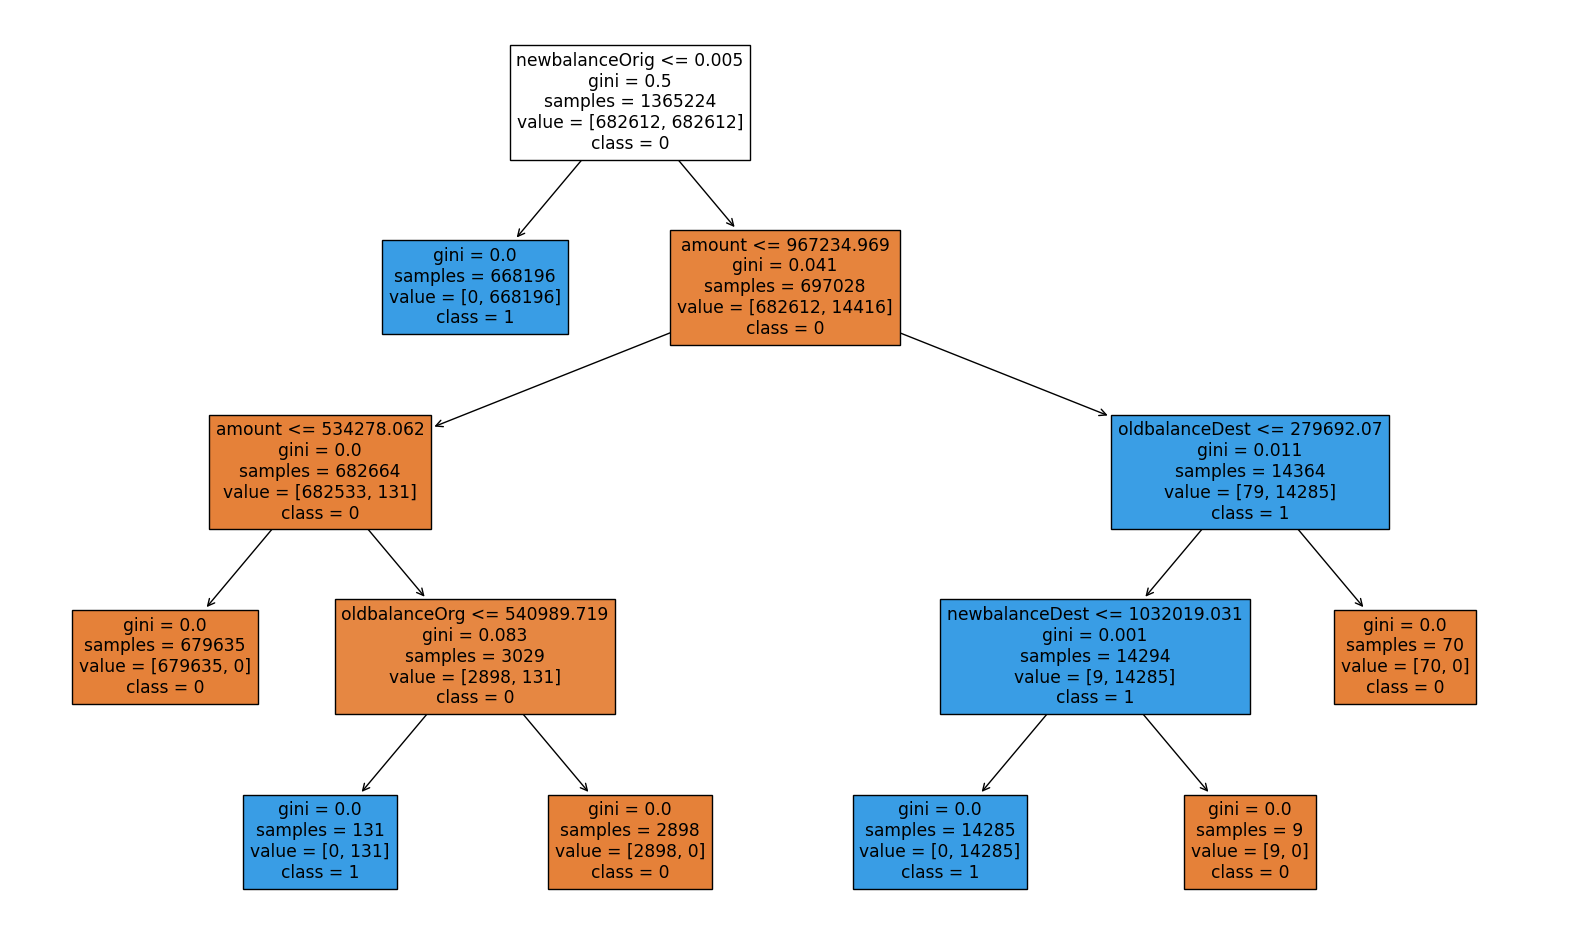

In [73]:
plt.figure(figsize=(20,12))
plot_tree(tree_pipeline.named_steps['decision_tree'], 
          filled=True, 
         feature_names = train_x.columns.tolist(), 
         class_names = list(map(str, train_y.unique().tolist())))
          
plt.show()

Surprisingly, "full-grown" tree has only 4 as a maximum depth, which is not large. It is also very explainable and steps are relatively logical. However, I will try to improve the decision tree even more. I will try to apply thresholds to decrease FP and FN rates. 



In [74]:
# list that will have all possible models 
models = []


## decision tree pipeline
tree_pipeline_best =  ImbPipeline([
    ('smote', SMOTE(random_state = 1042)),
    ('decision_tree', DecisionTreeClassifier(random_state=1042))
])

# append models that are going to be used 
models.append(('best decision tree', tree_pipeline_best))


In [75]:
# test decision tree (SMOTE method)   
## just to have recent results near
models_test(x_reduced, y_reduced, models, train_x, train_y, valid_x, valid_y)

Model best decision tree training Accuracy: 1.0000
Model best decision tree training Precision: 1.0000
Model best decision tree training Recall: 1.0000
Model best decision tree training F1 Score: 1.0000
Model best decision tree training ROC AUC: 1.0000

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual      0      1
     0 682612      0
     1      0   4905
Model best decision tree validation Accuracy: 1.0000
Model best decision tree validation Precision: 0.9997
Model best decision tree validation Recall: 0.9991
Model best decision tree validation F1 Score: 0.9994
Model best decision tree validation ROC AUC: 0.9995

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual      0      1
     0 455065      1
     1      3   3276
Model best decision tree Average cross-validation Accuracy: 1.0000
Model best decision tree Average cross-validation Precision: 0.9985
Model best decision tree Average cross-validation Recall: 0.9995
Model best decision tree Average cross-validatio

In [76]:
# fit
tree_pipeline_best.fit(train_x, train_y)


# thresholds
thresholds = np.linspace(0, 1, num=100)

# true labels
true_labels = []

# predict probabilities 
predicted_probabilities = tree_pipeline_best.predict_proba(valid_x)[:, 1]

# lists with rates 
fn_rates = []
fp_rates = []
fn_fp_list = []

# rates for each threshold (for loop)
for threshold in thresholds: 
    predicted_labels = (predicted_probabilities > threshold).astype(int)
    
    # calculate metrics 
    tn, fp, fn, tp = confusion_matrix(valid_y, predicted_labels).ravel()
    
    
    # append 
    fn_rate = fn / (fn + tp)
    fp_rate = fp / (fp + tn)
    fn_rates.append(fn_rate)
    fp_rates.append(fp_rate)
    
    # append thresholds and results 
    fn_fp_list.append((threshold, fp, fn))

# print 
for item in fn_fp_list:
    print(f'Threshold: {item[0]:.2f}, FP: {item[1]}, FN: {item[2]}')

Threshold: 0.00, FP: 1, FN: 3
Threshold: 0.01, FP: 1, FN: 3
Threshold: 0.02, FP: 1, FN: 3
Threshold: 0.03, FP: 1, FN: 3
Threshold: 0.04, FP: 1, FN: 3
Threshold: 0.05, FP: 1, FN: 3
Threshold: 0.06, FP: 1, FN: 3
Threshold: 0.07, FP: 1, FN: 3
Threshold: 0.08, FP: 1, FN: 3
Threshold: 0.09, FP: 1, FN: 3
Threshold: 0.10, FP: 1, FN: 3
Threshold: 0.11, FP: 1, FN: 3
Threshold: 0.12, FP: 1, FN: 3
Threshold: 0.13, FP: 1, FN: 3
Threshold: 0.14, FP: 1, FN: 3
Threshold: 0.15, FP: 1, FN: 3
Threshold: 0.16, FP: 1, FN: 3
Threshold: 0.17, FP: 1, FN: 3
Threshold: 0.18, FP: 1, FN: 3
Threshold: 0.19, FP: 1, FN: 3
Threshold: 0.20, FP: 1, FN: 3
Threshold: 0.21, FP: 1, FN: 3
Threshold: 0.22, FP: 1, FN: 3
Threshold: 0.23, FP: 1, FN: 3
Threshold: 0.24, FP: 1, FN: 3
Threshold: 0.25, FP: 1, FN: 3
Threshold: 0.26, FP: 1, FN: 3
Threshold: 0.27, FP: 1, FN: 3
Threshold: 0.28, FP: 1, FN: 3
Threshold: 0.29, FP: 1, FN: 3
Threshold: 0.30, FP: 1, FN: 3
Threshold: 0.31, FP: 1, FN: 3
Threshold: 0.32, FP: 1, FN: 3
Threshold:

Unexpected result as threshold can't find an optimal value where the FP and FN rates will be less. However, the decision tree has a very good performance. Last thing that can be tried is RandomSearch of hyperparameters. Random search is better than Grid-Search as Grid-Search is computationally intensive with big data.  

In [132]:
# random search parameters 
parameters = {
    'decision_tree__max_depth': [ 3, 4, 5],
    'decision_tree__max_features': ['auto', 'sqrt', 'log2', None],
    'decision_tree__criterion': ['gini', 'entropy', 'log_reduction'],
    'decision_tree__min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'decision_tree__min_samples_split': np.arange(2, 20, step=2)
}

# launch randomsearch 
random_search = RandomizedSearchCV(
            tree_pipeline_best, 
            param_distributions=parameters, 
            n_iter=11, 
            cv=5, 
            verbose=1, 
            random_state=1042, 
            n_jobs=-1)

# fit the random search 
random_search.fit(train_x, train_y)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


C:\Users\Beibarys Nyussupov\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 55.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Beibarys Nyussupov\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Beibarys Nyussupov\anaconda3\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Beibarys Nyussupov\anaconda3\lib\site-packages\imblearn\pipeline.py", line 326, in fit
    self._final_estimator.f

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smote',
                                              SMOTE(random_state=1042)),
                                             ('decision_tree',
                                              DecisionTreeClassifier(random_state=1042))]),
                   n_iter=11, n_jobs=-1,
                   param_distributions={'decision_tree__criterion': ['gini',
                                                                     'entropy',
                                                                     'log_reduction'],
                                        'decision_tree__max_depth': [3, 4, 5],
                                        'decision_tree__max_features': ['auto',
                                                                        'sqrt',
                                                                        'log2',
                                                                        None],
                                        'decision_tree__min_samples_leaf': [1,
                                                                            2,
                                                                            3,
                                                                            4,
                                                                            5,
                                                                            6],
                                        'decision_tree__min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])},
                   random_state=1042, verbose=1)

In [133]:
# best parameters 
print('Best parameters for Decision Tree', random_search.best_params_)

Best parameters for Decision Tree {'decision_tree__min_samples_split': 18, 'decision_tree__min_samples_leaf': 3, 'decision_tree__max_features': 'log2', 'decision_tree__max_depth': 5, 'decision_tree__criterion': 'entropy'}


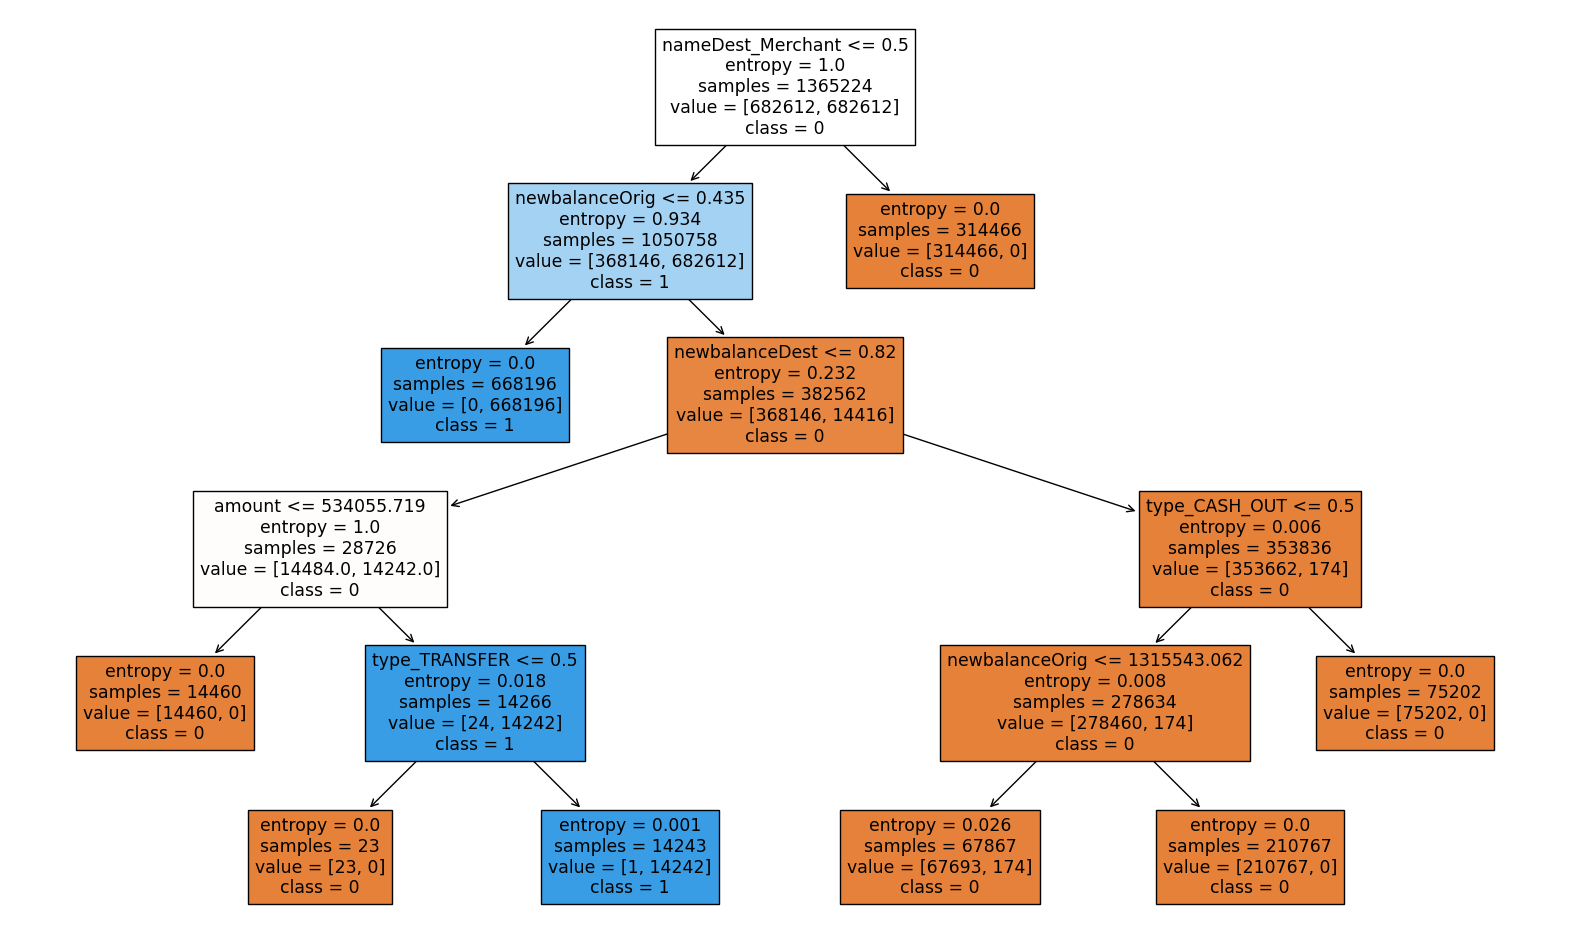

In [134]:
# best estimator 
best_estimator = random_search.best_estimator_

# plot
plt.figure(figsize=(20,12))
plot_tree(best_estimator.named_steps['decision_tree'], 
          filled=True, 
         feature_names = train_x.columns.tolist(), 
         class_names = list(map(str, train_y.unique().tolist())))
          
plt.show()

In [135]:
# test the best estimator 
# list that will have all possible models 
models = []

# append models that are going to be used 
models.append(('best decision tree', best_estimator))

models_test(x_reduced, y_reduced, models, train_x, train_y, valid_x, valid_y)

Model best decision tree training Accuracy: 1.0000
Model best decision tree training Precision: 0.9998
Model best decision tree training Recall: 0.9998
Model best decision tree training F1 Score: 0.9998
Model best decision tree training ROC AUC: 1.0000

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual      0      1
     0 682611      1
     1      1   4904
Model best decision tree validation Accuracy: 1.0000
Model best decision tree validation Precision: 0.9994
Model best decision tree validation Recall: 0.9991
Model best decision tree validation F1 Score: 0.9992
Model best decision tree validation ROC AUC: 0.9995

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual      0      1
     0 455064      2
     1      3   3276
Model best decision tree Average cross-validation Accuracy: 0.9999
Model best decision tree Average cross-validation Precision: 0.9868
Model best decision tree Average cross-validation Recall: 0.9996
Model best decision tree Average cross-validatio

That is the best parameters that we can get. It is the most explainable while it also has a good performance. The increase in explainability costed only by 1 increase in FP. 

# Final Visualizations

## Confusion Matrix

C:\Users\Beibarys Nyussupov\AppData\Local\Temp\ipykernel_35728\3363342237.py:32: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=True, edgecolor='lightgrey', lw=0.5, color=color))


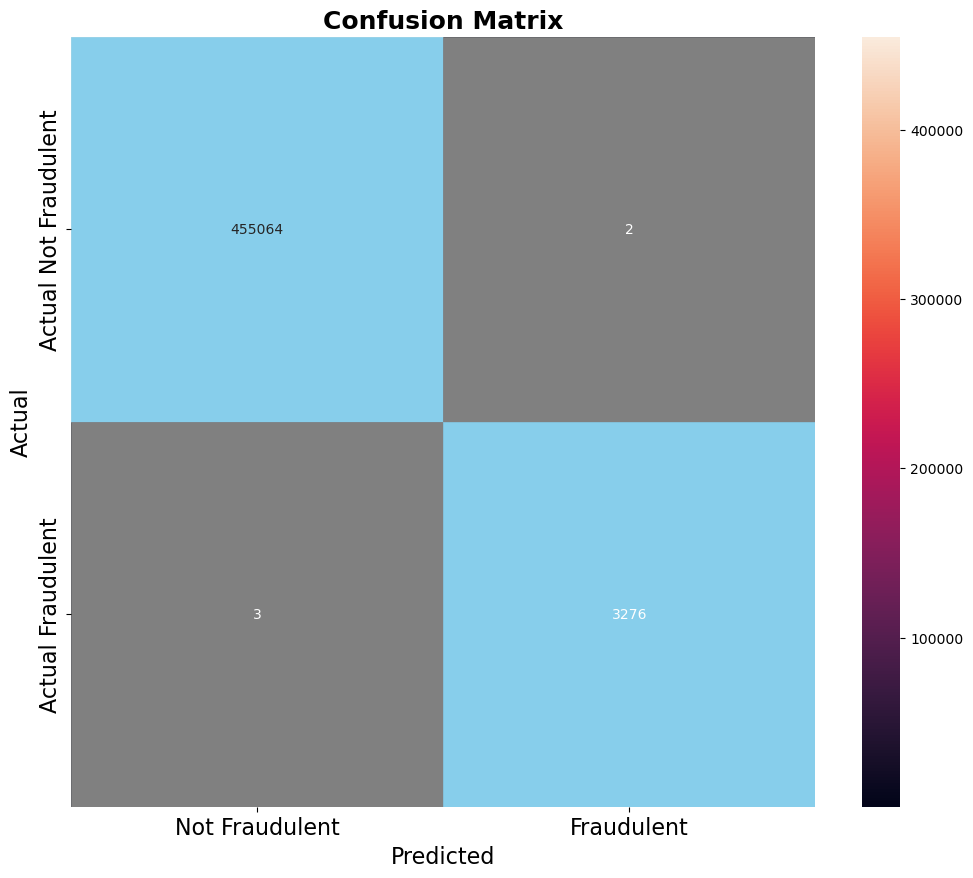

In [136]:
# threshold classic = 0.5
threshold = 0.5

# true labels
true_labels = []

# predict probabilities 
predicted_probabilities = best_estimator.predict_proba(valid_x)[:, 1]

# predict labels
predicted_labels = (predicted_probabilities > threshold).astype(int)
    
# confusion matrix 
matrix = confusion_matrix(valid_y, predicted_labels)


# heatmap
## figure size (length, width)
plt.figure(figsize=(12, 10))

## heatmap itself
sns.heatmap(matrix, annot=True, fmt='d', 
            xticklabels=['Not Fraudulent', 'Fraudulent'], 
            yticklabels=['Actual Not Fraudulent', 'Actual Fraudulent'])
        
##
colors = ['skyblue', 'grey', 'grey', 'skyblue']

for i, color in enumerate(colors):
    y = i // 2
    x = i % 2
    plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=True, edgecolor='lightgrey', lw=0.5, color=color))
    
# parameters 
## x  
plt.xlabel('Predicted', fontsize = 16)
plt.xticks(fontsize=16)

## y 
plt.ylabel('Actual', fontsize = 16)
plt.yticks(fontsize=16)


## title
plt.title('Confusion Matrix', fontweight = 'bold', fontsize = 18)

# plot
plt.show()
    

## Explainable Plot tree



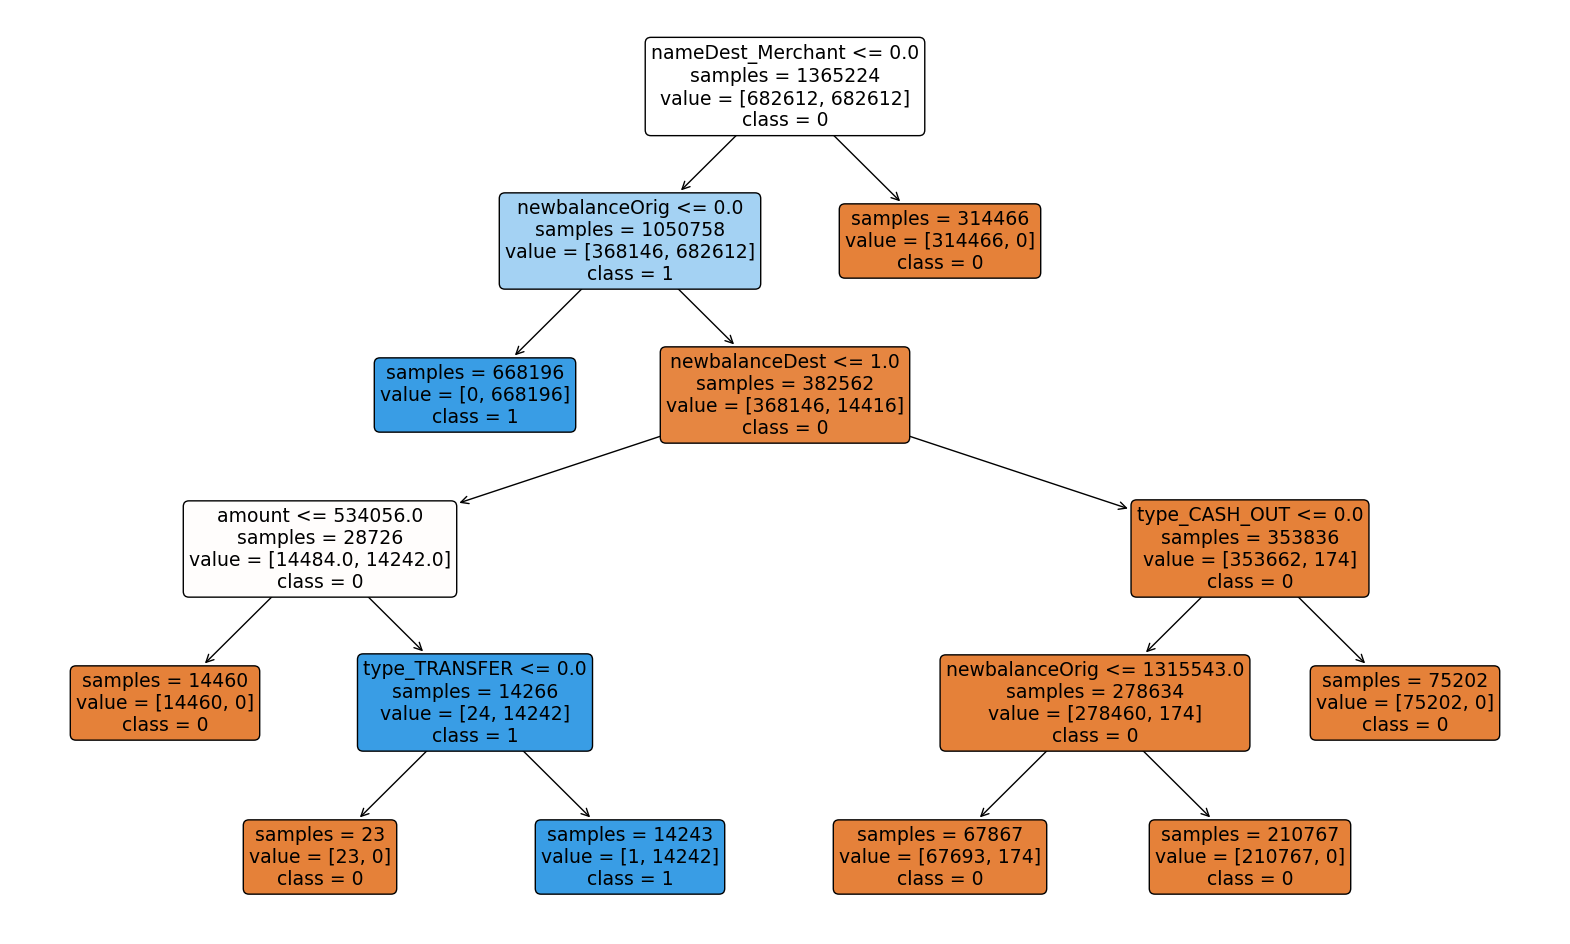

In [183]:
# plot explainable and interpretable decision tree 
# plot
plt.figure(figsize=(20,12))
plot_tree(best_estimator.named_steps['decision_tree'], 
          filled=True, 
          rounded = True, 
          proportion = False, 
          impurity = False, 
        precision = 0,
         feature_names = train_x.columns.tolist(), 
         class_names = list(map(str, train_y.unique().tolist())))


# save the tree 
plt.savefig('decision_tree.png', format='png', bbox_inches='tight', dpi=300)  

plt.show()


## Feature Importance 



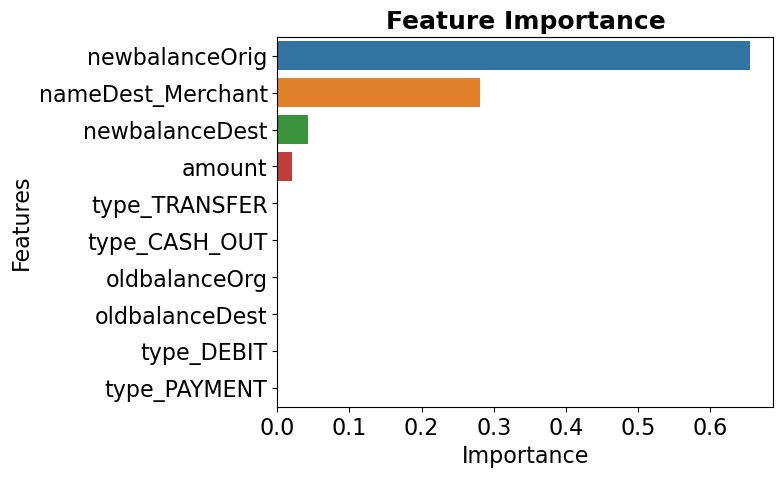

In [146]:
# for feature importance 
feature_importance  = pd.Series(best_estimator.named_steps['decision_tree'].feature_importances_, 
                               index = x_reduced.columns).sort_values(ascending = False)


# plot 
sns.barplot(x = feature_importance, 
           y = feature_importance.index)


# parameters 
## title 
plt.title('Feature Importance', fontweight = 'bold', fontsize = 18)

## x
plt.xlabel('Importance', fontsize = 16)
plt.xticks(fontsize = 16)

## y 
plt.ylabel('Features', fontsize = 16)
plt.yticks(fontsize = 16)


plt.show()

## Residual Observations


In [169]:
# predictions 
predictions = best_estimator.predict(valid_x)

# mark predictions which are correct 
correct = predictions == valid_y

## mark incorrect predictions 
incorrect = valid_x[~correct]

# create dataframe for observation 
incorrect['True Labels'] = valid_y[~correct]
incorrect['Predicted Labels'] = predictions[~correct]

# print
pd.DataFrame(incorrect)

C:\Users\Beibarys Nyussupov\AppData\Local\Temp\ipykernel_35728\2819450721.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect['True Labels'] = valid_y[~correct]
C:\Users\Beibarys Nyussupov\AppData\Local\Temp\ipykernel_35728\2819450721.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect['Predicted Labels'] = predictions[~correct]


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_Merchant,True Labels,Predicted Labels
6205439,353874.22,353874.22,353874.22,0.00,0.00,0,0,0,1,0,1,0
5086130,29096.95,29097.16,0.21,32876220.28,32905317.23,1,0,0,0,0,0,1
377151,42062.82,340830.43,298767.61,398931.35,678419.64,1,0,0,0,0,1,0
181521,1041897.02,1061894.12,19997.10,148054.69,0.00,0,0,0,1,0,0,1
6281484,399045.08,10399045.08,10399045.08,0.00,0.00,0,0,0,1,0,1,0


Final List of variables used:

| Column         | Description                                                          |
|----------------|----------------------------------------------------------------------|
| type           | The type of online transaction.                                      |
| amount         | The amount of the transaction.                                       |
| oldBalanceOrg  | The balance before the transaction of the initiator.                 |
| newBalanceOrig | The balance after the transaction of the initiator.                  |
| nameDest       | The recipient of the transaction.         Merchant/Client            |
| oldBalanceDest | The initial balance of the recipient before the transaction.         |
| newBalanceDest | The new balance of the recipient after the transaction.              |
| isFraud        | Indicates whether the transaction is fraudulent (`Yes` or `No`).     |

# Future Considerations
1. Using all rows without the need to reduce the size of the data - GPUs, additional resources are required to complete the objective 
2. While the decision tree already has a high performance, it is possible to try and use bagging, random forest, and boosting algorithms. 
3. Including more complicated cleaning processes, such as PCA, Outliers Elimination
4. Verifying each transaction in CASHOUT and TRANSFER types by telephone verification message might be a good complementary solution to a decision tree which will improve the safety and performance of the model to higher levels. 